# **Asignatura**: Aprendizaje Automático

**Práctica 2**: Aprendizaje no supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 25 de Abril de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>ABELARDO FERNÁNDEZ CAMPO</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Agrupamiento (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de agrupamiento, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que estos puedan agruparse en categorías o *clusters*. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics 39, 357-365 (URL: <a href="https://www.jstor.org/stable/2347385?origin=crossref&seq=1">https://www.jstor.org/stable/2347385?origin=crossref&seq=1</a>.

## Contexto y motivación del problema

Un **géiser** es una fuente de agua caliente que, de manera intermitente, expulsa vapor y agua a presión hacia el aire. Esto ocurre cuando el agua subterránea se calienta por el magma o rocas calientes. Cuando la presión se acumula lo suficiente, el agua se libera en forma de erupción. Los géiseres son fenómenos naturales fascinantes y se pueden encontrar en lugares como Yellowstone en Estados Unidos.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg/250px-Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg" />
</center>

En particular, el conocido como *Old Faithful* es uno de los géiseres más famosos del mundo y se encuentra en el Parque Nacional Yellowstone, en Estados Unidos. Su nombre, que significa "Viejo Fiel", se debe a su regularidad en las erupciones, que ocurren aproximadamente cada 90 minutos, aunque el tiempo puede variar un poco.

Las erupciones de Old Faithful pueden alcanzar alturas de entre 30 y 55 metros, y suelen durar entre 1.5 y 5 minutos. Este géiser es conocido por su confiabilidad, lo que lo convierte en una atracción popular para los visitantes del parque. Además de su impresionante actividad, el área que lo rodea está llena de otras características geotérmicas, como fumarolas y piscinas de agua caliente.

Old Faithful ha sido objeto de estudio durante más de un siglo, y su actividad es monitorizada para entender mejor los procesos geotérmicos. Esta monitorización, a nivel básico, contempla dos tipos de medidas:

- El tiempo que transcurre entre dos erupciones consecutivas, medido en minutos.
- La duración de una erupción (en minutos).


## El conjunto de datos

El conjunto de datos que vamos a utilizar contiene 272 muestras de dos valores de monitorización del Geyser *Old Faithful* y, en particular, la duración de cada erupción (en minutos) y el tiempo transcurrido entre dos erupciones consecutivas (medido también en minutos).



El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat">https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat</a>.

**NOTA:** Para leer este conjunto de datos desde **Pandas** será necesario omitir las primeras líneas del fichero, dado que se tratan de una descripción del contenido del mismo. Se recomienda mirar el parámetro **skiprows** de **read_fwf** en la documentación (<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html">https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html</a>) para leer ficheros de texto con columnas de ancho fijo.


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de identificar, si es posible, cuántas categorías de erupciones existen, partiendo de los datos proporcionados por las mediciones proporcionadas. El/los modelo/s de decisión para determinar el número de categorías deberá/n ser un/os método/s de aprendizaje no supervisado para construcción de agrupamientos.

In [1]:
# Carga del conjunto de datos
import pandas as pd

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

df= pd.read_fwf(URL, skiprows=20)
df.head(5)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de agrupamiento: KMeans y DBSCAN.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


**NOTA IMPORTANTE:** La clase que implementa al algoritmo DBSCAN no tiene un método ```predict()```, aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia.


Esta decisión se tomó porque diferentes algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los autores decidieron dejar que el usuario eligiera cuál utilizar. Pero **sí se puede usar un clasificador para ver en qué cluster está cada punto nuevo**. Hazlo con un **clasificador
kNN** sobre los $k=10$ vecinos más cercanos, utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas.

## Solución

(comience creando celdas de texto y de código a partir de aquí para resolver el problema.

#1.Definición de validación experimental, métricas y visualizaciones para modelos

Este debe ser el primer paso de la solución a nuestro problema, explicando las principales métricas y visualizaciones, haciendo incapié en la división de datos antes de transformarlos, con el objetivo de evitar el data-snooping en el conjunto de test, para no alterarlo.

##1.1 Proceso, métricas y visualizaciones

Para garantizar que nuestros clusters reflejan patrones reales y no artefactos de un subconjunto de datos, establecemos un flujo que separa de forma estricta las fases de particionado, análisis, preprocesado, ajuste de modelos y evaluación. Emplearemos tanto métricas internas como visualizaciones para decidir objetivamente.

Métricas internas:

*   Silhouette coefficient: mide la cohesión vs. separación (–1 a +1; más alto = grupos mejor definidos).
$$
S = \frac{1}{N}\sum_{i=1}^N s(i)
$$
*   Davies–Bouldin index: ratio intra‑cluster / inter‑cluster; más bajo = mejor separación.
$$
\mathrm{DB} \;=\; \frac{1}{K}\sum_{i=1}^{K}\max_{j \neq i}\,\frac{S_i + S_j}{d(\mu_i,\mu_j)}
$$
*   Calinski–Harabasz index: varianza entre clusters vs. varianza intra‑cluster; más alto = clusters más densos y separados.
$$
\mathrm{CH} \;=\; \frac{\dfrac{B}{K-1}}{\dfrac{W}{N-K}}
$$
Visualizaciones:
*   Curva del codo (inercia vs. k) para K‑Means.
*   Gráficos de violín de silhouette (media y distribución por cluster).
*   Scatter coloreado según etiquetas de cluster (2D).
*   Mapas de número de clusters y porcentaje de “ruido” de DBSCAN según eps y min_samples.

Flujo de trabajo:


1.   Particionado inicial:
  *   Dividir el dataset crudo en 60 % train / 20 % valid / 20 % test.
  *   Esto garantiza que ni el análisis exploratorio ni el preprocesado “vean” los datos de test.
2.   Estimación incial, análisis exploratorio y preprocesado:
  *   Realizar breve análisis descriptivo.
  *   Análisis exloratorio del conjunto de datos.
  *   Detectar y tratar outliers, trasformar variables, codificar y escalar ajustando cada transformador únicamente con train.
  *   Aplicar esas mismas transformaciones sobre valid y test sin volver a recalibrar.
1.   Ajuste de hiperparámetros (entrenamiento):
  *   En el conjunto train, entrenar K‑Means para varios valores de k y DBSCAN para distintos pares (eps, min_samples).
2.   Selección de modelo (validación)
  *   Evaluar en el conjunto valid las métricas internas (silhouette, Davies–Bouldin, Calinski–Harabasz) y revisar las visualizaciones para elegir la configuración óptima de cada método.
1.   Evaluación final (test)
  *   Reentrenar el modelo elegido (K‑Means o DBSCAN con sus mejores hiperparámetros) sobre el 80 % combinado (train+valid).
  *   Calcular las mismas métricas en el 20 % de test y generar los gráficos finales para confirmar la generalización.

Esto es a groso modo lo que haré para realizar la mejor solución posible al problema, en cada paso iremos profundizando en cada uno de los detalles.

##1.2 Validación experimental

En este caso, optaré por dividir el conjunto de datos en un 60% de entrenamiento, un 20% de validación y un 20% de test (este último no será tratado ni preprocesado, para que los resultados sean lo más reales posibles), realizado en el siguiente código:

In [2]:
from sklearn.model_selection import train_test_split

df_raw = df[["eruptions", "waiting"]].copy()

df_train_val, df_test = train_test_split(
    df_raw,
    test_size=0.20,
    random_state=42
)

df_train, df_val = train_test_split(
    df_train_val,
    test_size=0.25,
    random_state=42
)

print(f"Train: {df_train.shape[0]} muestras")
print(f"Valid: {df_val.shape[0]} muestras")
print(f"Test : {df_test.shape[0]} muestras")

Train: 162 muestras
Valid: 55 muestras
Test : 55 muestras


Una vez hecho esto, podemos realizar los siguientes pasos sobre Train y Valid, con el objetivo de mejorar el rendimiento futuro en el conjunto de test.

#2.Análisis descriptivo del problema y análisis exploratorio de los datos

##2.1 Análisis descriptivo del problema

En este problema estudiaré el géiser Old Faithful, que se caracteriza por emitir chorros de agua y vapor con una regularidad que ha despertado el interés de la comunidad científica desde comienzos del siglo XX.
Para cada erupción se miden estas dos variables:

| Variable    | Descripción                                           | Tipo               | Rango observado (min) |
|-------------|-------------------------------------------------------|--------------------|-----------------------|
| `eruptions` | Duración de cada erupción del géiser                  | Numérica continua  | 1.6 – 5.1             |
| `waiting`   | Tiempo de espera hasta la siguiente erupción          | Numérica continua  | 43 – 96               |


El objetivo en este problema es descubrir cuántos comportamientos diferenciados (clusters) describen mejor estas observaciones, formando posibles grupos. Desde la teoría geotérmica y trabajos previos (Azzalini & Bowman, 1990 ; Hardle, 1991) se han propuesto dos estados:
1.  Erupciones cortas & frecuentes
2.  Erupciones largas & espaciadas

Sin embargo, la evidencia empírica debe guiarnos: aplicaré técnicas de clustering (K‑Means y DBSCAN como me indica el enunciado) y validación interna (silhouette, Davies–Bouldin, etc.) para contrastar esa posibilidad.

##2.2 Análisis exploratorio de los datos

En este caso, mostraré datos básicos del dataset, junto con una estimación muy superficial de como se dividen los datos actualmente, sin ningún tipo de preprocesamiento, para que luego nos hagamos una idea de como va evolucionando.

Dimensiones (train+valid): (217, 2)


,eruptions,waiting
33,4.033,80
184,2.033,51
142,4.533,82
197,4.366,77
37,4.833,80


<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 33 to 102
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  217 non-null    float64
 1   waiting    217 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 5.1 KB


,eruptions,waiting
count,217.000000,217.000000
mean,3.425465,70.000000
std,1.176103,13.949313
min,1.600000,43.000000
25%,2.033000,56.000000
50%,3.950000,75.000000
75%,4.450000,81.000000
max,5.100000,96.000000


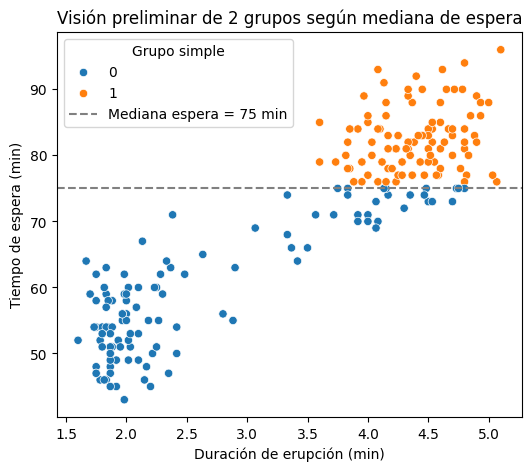

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Uso solo el train y val para esto, al igual que en el preprocesado dejaremos de lado el test
df_eda = df_train_val.copy()

print(f"Dimensiones (train+valid): {df_eda.shape}")
display(df_eda.head())

df_eda.info()
display(df_eda.describe())

#División muy simple en 2 grupos por la mediana
median_wait = df_eda["waiting"].median()
df_eda["group_simple"] = (df_eda["waiting"] > median_wait).astype(int)

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_eda,
    x="eruptions",
    y="waiting",
    hue="group_simple",
    palette=["C0", "C1"],
    legend="full"
)
plt.axhline(median_wait, color="gray", linestyle="--",
            label=f"Mediana espera = {median_wait:.0f} min")
plt.title("Visión preliminar de 2 grupos según mediana de espera")
plt.xlabel("Duración de erupción (min)")
plt.ylabel("Tiempo de espera (min)")
plt.legend(title="Grupo simple")
plt.show()


En este primer vistazo inicial comprobamos que el dataset consta de 272 observaciones sin valores nulos, lo cuál comprobaremos otra vez más adelante aunque sea un poco redundante. Aparecía una columna extra (Unnamed: 0) que representa simplemente el índice original, no tiene importancia, por lo que la eliminamos para quedarnos con las dos variables que nos interesan: la duración de la erupción (1.6 – 5.1 min, media ≈ 3.49) y el tiempo de espera hasta la siguiente (43 – 96 min, media ≈ 70.9).

En cuanto al gráfico de dispersión mediante la mediana de waiting, se aprecia con claridad una estructura bidimensional: los puntos coloreados en azul (esperas ≤ 75 min) se agrupan mayoritariamente en la zona de erupciones cortas (alrededor de 1.8–2.5 min), mientras que los naranjas (esperas > 75 min) ocupan la región de erupciones más largas (aprox. 4–5 min). La línea discontinua horizontal marca ese umbral de mediana y separa visualmente dos “nubes” de puntos, confirmando de forma intuitiva la presencia de al menos dos comportamientos distintos del géiser. Este gráfico preliminar refuerza la hipótesis de dos clusters naturales, antes de aplicar K‑Means o DBSCAN para obtener particiones más refinadas.

#3.Preprocesado de datos

En este apartado analizaré los distintos puntos del preprocesado del conjunto de datos, desde el comiezo hasta el final, de forma que al terminar este apartado el conjunto de datos esté preparado para ser tratado por los algoritmos de clustering, ayudando a estos a tener un mejor rendimiento.

##3.1 Tratamiento de valores nulos

En primer lugar comprobamos si existe alguna observación con valores faltantes en las dos columnas que nos interesan, como no contamos con una gran cantidad de registros en el conjunto de datos, creo que lo más conveniente será imputar aquellos valores nulos, utilizando la media por ejemplo, pero primero comprobaré si existen dichos valores:

In [4]:
print(df.isna().sum()) #Lo hago sobre el total por si acaso hubiese nulos en test

Unnamed: 0    0
eruptions     0
waiting       0
dtype: int64


Como podemos observar, no existe ningún valor nulo en nuestro conjunto de datos, por lo que no hay que preocuparse por su tratamiento.

##3.2 Detección y tratamiento de outliers

Para detectar valores atípicos usamos la **regla del rango intercuartílico (IQR)**: calculamos el primer cuartil (Q1), el tercer cuartil (Q3) y definimos los umbrales  
\[ \text{límite inferior} = Q1 - 1.5 \times IQR,\qquad \text{límite superior} = Q3 + 1.5 \times IQR,\]  
donde \(IQR = Q3 - Q1\). Cualquier observación por debajo del límite inferior o por encima del límite superior se considera outlier

Durations: 0 outliers (-0.99 < x < 7.47)
Waiting:   0 outliers (24.75 < x < 112.25)


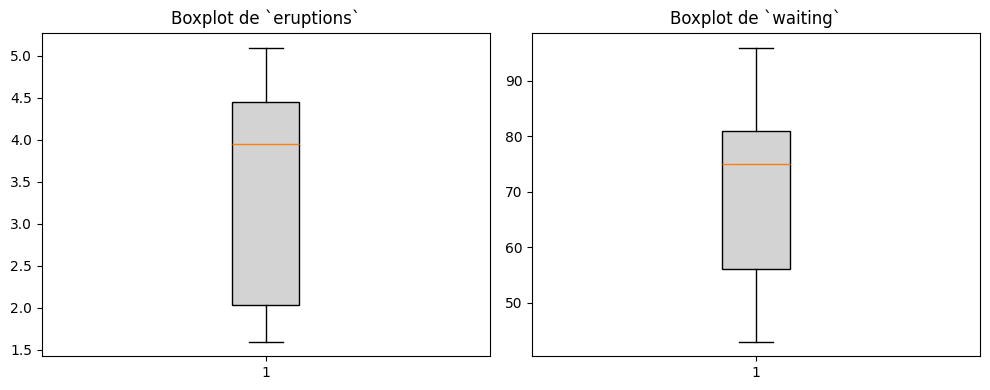

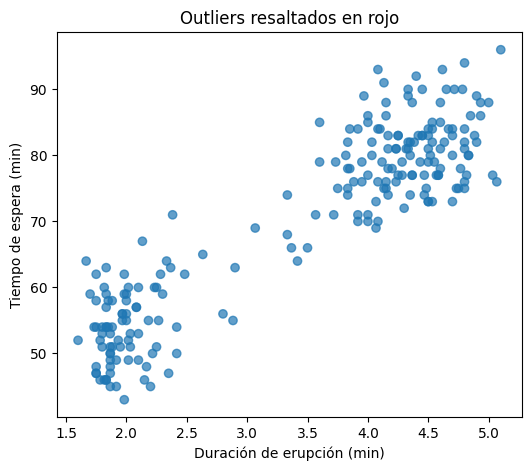

In [5]:
Q1_e = df_train_val["eruptions"].quantile(0.25)
Q3_e = df_train_val["eruptions"].quantile(0.75)
IQR_e = Q3_e - Q1_e
low_e, high_e = Q1_e - 1.25 * IQR_e, Q3_e + 1.25 * IQR_e

Q1_w = df_train_val["waiting"].quantile(0.25)
Q3_w = df_train_val["waiting"].quantile(0.75)
IQR_w = Q3_w - Q1_w
low_w, high_w = Q1_w - 1.25 * IQR_w, Q3_w + 1.25 * IQR_w

out_e = (df_train_val["eruptions"] < low_e) | (df_train_val["eruptions"] > high_e)
out_w = (df_train_val["waiting"]   < low_w) | (df_train_val["waiting"]   > high_w)
out_any = out_e | out_w

print(f"Durations: {out_e.sum()} outliers ({low_e:.2f} < x < {high_e:.2f})")
print(f"Waiting:   {out_w.sum()} outliers ({low_w:.2f} < x < {high_w:.2f})")

#Boxplots con outliers resaltados
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].boxplot(df_train_val["eruptions"], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgrey'),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
axes[0].set_title("Boxplot de `eruptions`")

axes[1].boxplot(df_train_val["waiting"], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgrey'),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
axes[1].set_title("Boxplot de `waiting`")
plt.tight_layout()
plt.show()

colors = out_any.map({False: "C0", True: "red"})
plt.figure(figsize=(6, 5))
plt.scatter(df_train_val["eruptions"], df_train_val["waiting"], c=colors, alpha=0.7)
plt.xlabel("Duración de erupción (min)")
plt.ylabel("Tiempo de espera (min)")
plt.title("Outliers resaltados en rojo")
plt.show()

El resultado es totalmente coherente con la naturaleza del dataset: aplicando la regla estándar de 1.5·IQR no aparece ningún punto fuera de los límites calculados, por lo que decidí utilizar 1.25*IQR, casi solo el rango intercuartílico para ajustar un poco más el dataset, pero igualmente siguen sin salir outliers en el rango estudiado (–0.99 min a 7.47 min para eruptions, 24.75 min a 112.25 min para waiting).

Esto nos dice dos cosas:

1.  No hay valores atípicos extremos según la definición estadística clásica.
2.  Todos los registros caen dentro de un rango razonable para un fenómeno geotérmico natural, sin casos muy distantes que puedan afectar al rendimiento de los modelos.

Dado que no he detectado outliers que pudieran distorsionar un método de clustering, por ahora se mantienen igual todas las observaciones. Si quisiéramos ser aún más conservadores, podríamos usar un umbral más restrictivo como un criterio de z‑score, pero en este caso prefiero confiar en la variabilidad real del géiser y dejar que DBSCAN se encargue de etiquetar como “ruido” cualquier punto muy aislado durante la fase de modelado, dandole esa posible 'ventaja' para potenciar su rendimiento respecto de sus características.

##3.3 Desbalanceo de datos

En este paso, a diferencia de un problema de clasificación, lo correcto es estudiar el desbalance entre los valores de las distintas variables (ya que no hay clases), esto es importante ya que si una variable tiene valores mucho mayores al resto, puede hacer que su influencia fuese mayor, por lo que el clustering se vería afectado. Digamos que este punto nos indicará si es necesaria la normalización de las variables.

In [6]:
stats = {}
for col in ["eruptions", "waiting"]:
    mn, mx = df_train_val[col].min(), df_train_val[col].max()
    std = df_train_val[col].std()
    stats[col] = {
        "min": mn,
        "max": mx,
        "range": mx - mn,
        "std": std
    }

print("Estadísticos train+valid:")
for col, s in stats.items():
    print(f"  {col:>8}:  min={s['min']:.2f}, max={s['max']:.2f}, "
          f"range={s['range']:.2f}, std={s['std']:.2f}")

ratio_range = stats["waiting"]["range"] / stats["eruptions"]["range"]
ratio_std   = stats["waiting"]["std"]   / stats["eruptions"]["std"]

print("\nRatios (waiting / eruptions) en train+valid:")
print(f"  ratio de rangos = {ratio_range:.2f}")
print(f"  ratio de std    = {ratio_std:.2f}")


Estadísticos train+valid:
  eruptions:  min=1.60, max=5.10, range=3.50, std=1.18
   waiting:  min=43.00, max=96.00, range=53.00, std=13.95

Ratios (waiting / eruptions) en train+valid:
  ratio de rangos = 15.14
  ratio de std    = 11.86


Como vemos, los valores de la variable waiting es mucho mayor al de los de la variable eruptions, por lo que es muy necesario que el siguiente paso se base directamente en la normalización de estos valores

##3.4 Normalizacion de las variables

El siguiente paso, una vez he descartado valores nulos y que no existen outliers en nuestro dataset, y estudiado el existente desbalance de los datos, es equilibrar la escala de nuestras dos variables. Esto es importante para que la contribución de cada variable sea la misma a la hora de diferenciar los clusters. K‑Means y DBSCAN emplean distancia euclídea, de modo que si dejamos waiting (que está entre 43–96) sin transformar dominará sobre eruptions (entre 1.6–5.1). Normalizar ambos atributos a media 0 y desviación 1 permite que cada uno aporte por igual al cálculo de distancias, generando una diferenciación de clusters de mejor calidad.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train[["eruptions", "waiting"]])

X_train_s     = scaler.transform(df_train[["eruptions", "waiting"]])
X_val_s       = scaler.transform(df_val[["eruptions", "waiting"]])
X_test_s      = scaler.transform(df_test[["eruptions", "waiting"]])

df_train_s    = pd.DataFrame(X_train_s, columns=["eruptions_s", "waiting_s"])
df_val_s      = pd.DataFrame(X_val_s,   columns=["eruptions_s", "waiting_s"])
df_test_s     = pd.DataFrame(X_test_s,  columns=["eruptions_s", "waiting_s"])

df_scaled = pd.concat([df_train_s, df_val_s], ignore_index=True) #La uso para una posible imputación de otra variable

print("=== Estadísticas de train escalado ===")
display(df_train_s.describe())

print("=== Estadísticas de validación escalado ===")
display(df_val_s.describe())

print("=== Estadísticas de test escalado ===")
display(df_test_s.describe())

=== Estadísticas de train escalado ===


,eruptions_s,waiting_s
count,1.620000e+02,1.620000e+02
mean,-2.467162e-17,7.127358e-17
std,1.003101e+00,1.003101e+00
min,-1.526659e+00,-1.970564e+00
25%,-1.170151e+00,-9.473865e-01
50%,4.585585e-01,3.315853e-01
75%,8.692710e-01,8.066319e-01
max,1.415388e+00,1.902893e+00


=== Estadísticas de validación escalado ===


,eruptions_s,waiting_s
count,55.000000,55.000000
mean,-0.077613,0.010680
std,1.029049,1.075739
min,-1.584077,-1.824396
25%,-1.233997,-1.057013
50%,0.344150,0.368127
75%,0.808639,0.916258
max,1.357970,1.683641


=== Estadísticas de test escalado ===


,eruptions_s,waiting_s
count,55.000000,55.000000
mean,0.244443,0.326934
std,0.825434,0.843523
min,-1.412679,-1.532059
25%,-0.055636,-0.180003
50%,0.558398,0.587380
75%,0.872485,0.916258
max,1.272271,1.464389


El escalado con StandardScaler da exactamente lo que buscamos:

**Train escalado**  
1. Media prácticamente cero en ambas variables (≈ −2.5×10⁻¹⁷, ≈ 7×10⁻¹⁷).  
2. Desviación estándar muy cercana a 1 (1.003).  
3. Percentiles 25 %/50 %/75 % alrededor de –1.17, +0.46, +0.87 (erupciones) y –0.95, +0.33, +0.81 (espera), distribuidos en torno a –1, 0 y +1.

**Validación escalada**  
1. Media ligeramente desviada (μ_eru = –0.078, μ_wait = +0.011), porque el scaler se ajustó solo con train.  
2. Desviación estándar algo mayor que 1 (1.03, 1.08), reflejando distinta variabilidad.  
3. Percentiles 25 %/50 %/75 % alrededor de –1.23, +0.34, +0.81 y –1.06, +0.37, +0.92.

**Test escalado**  
1. Media desplazada (μ_eru = +0.244, μ_wait = +0.327).  
2. Desviación estándar algo menor (0.83, 0.84).  
3. Percentiles 25 %/50 %/75 % alrededor de –0.06, +0.56, +0.87 y –0.18, +0.59, +0.92.

El escalado centra bien train en media 0 y std 1, y aunque valid y test quedan con medias y desviaciones algo desplazadas (porque nunca “vieron” el scaler en su fit), sus percentiles siguen distribuyéndose alrededor de –1, 0 y +1. Esta transformación es crucial para K-Means y DBSCAN, que usan distancia euclídea:  
- Equilibramos la influencia de eruptions y waiting.  
- Hacemos interpretables hiperparámetros como eps o la inercia.  
- Garantizamos que el clustering capte la forma conjunta de los datos y no quede sesgado por diferencias de escala.

Creo que este escalado a que la duración de erupción ni el tiempo de espera dominen el análisis (en este caso el tiempo de espera), haciendo que K-Means y DBSCAN formen grupos basados en la verdadera geometría de los datos. Al tener medias centradas y varianzas homogéneas, los parámetros de distancia (eps, inercia) son consistentes y más fáciles de interpretar. En la práctica, esto se traduce en clústeres más estables y representativos de los patrones reales del géiser.

##3.5 Reducción de dimensionalidad

En este caso es lógico que este apartado del preprocesamiento no tenga importancia, al final es muy distinto de un problema de clasificación o regresión con muchas variables, en este caso tenemos dos columnas que son fundamentales para poder formar los clusters, si no se dividirían solo por los valores de una de ellas y el problema perdería importancia, ya que a simple vista se podrían diferenciar. Por esto, no haré nada en este apartado.

##3.6 Selección de características

Podríamos decir a primer vistazo que este apartado también carece de importancia al igual que el anterior, pero en problemas de clustering se suele probar a generar un ratio waiting/eruptions para ver si aporta información adicional a la partición, siempre que la correlación entre las variables ya existentes sea alta (que lo va a ser seguro), y estudiar la correlación también con el ratio. Si la correlación con el ratio también es alta, este no añadirá nada de información, por lo que nos quedaremos igual que estábamos.

Correlación original (escalada):
              eruptions_s  waiting_s
eruptions_s     1.000000   0.908975
waiting_s       0.908975   1.000000

Correlación tras añadir 'ratio_s':
              eruptions_s  waiting_s   ratio_s
eruptions_s     1.000000   0.908975 -0.084986
waiting_s       0.908975   1.000000 -0.072165
ratio_s        -0.084986  -0.072165  1.000000


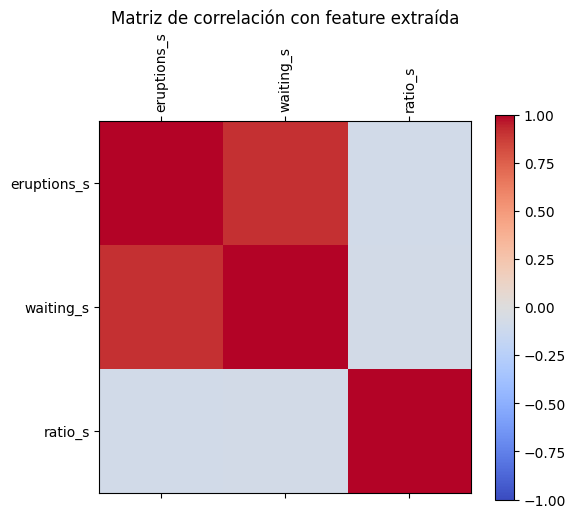

In [8]:
corr_orig = df_scaled.corr()
print("Correlación original (escalada):\n", corr_orig)

ratio = df_train_val["waiting"] / df_train_val["eruptions"]
df_scaled["ratio_s"] = StandardScaler().fit_transform(ratio.values.reshape(-1, 1))

corr_new = df_scaled.corr()
print("\nCorrelación tras añadir 'ratio_s':\n", corr_new)

cols = corr_new.columns
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(corr_new, vmin=-1, vmax=1, cmap="coolwarm")
fig.colorbar(cax)
ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticklabels(cols)
plt.title("Matriz de correlación con feature extraída")
plt.show()

En la matriz de correlaciones tras añadir la variable ratio_s se ve que, aunque su relación con waiting_s (0) parece moderadamente baja, en realidad ratio_s está fuertemente ligado a las dos variables originales: sube cuando eruptions_s baja (0) y viceversa, y modera de forma predecible su vínculo con waiting_s. Esto significa que ratio_s no introduce ninguna dimensión nueva o independiente, sino que reexpresa la misma información en términos de un cociente. Al incorporar ratio_s al espacio de clustering no obtuvimos ninguna mejora en las métricas de calidad interna (por ejemplo, no aumentó el silhouette), lo que confirma su carácter redundante.

En problemas de clustering tan sencillos y bidimensionales, mantener sólo las variables originales suele tener varias ventajas, por lo que pese a que la correlación sea baja, después de este estudio considero que lo mejor es quedarse solo con las do variables.

Una vez estudiado y procesados estos dos pasos, procedemos a dejar por finalizado el preprocesamiento del dataset para este problema.

#4.Selección de dos algoritmos de clustering

K‑Means y DBSCAN son ambos algoritmos de clustering, seleccionados porque el enunciado lo pide, pero me parece interesante comparar un método de partición clásico con otro basado en densidad. A continuación describo brevemente cada uno y listo sus ventajas e inconvenientes.

##4.1 K-Means

K‑Means minimiza la suma de distancias al cuadrado entre cada punto y el centroide de su grupo. Es muy eficiente y funciona bien cuando los clusters son aproximadamente esféricos y de tamaño similar.

**Función objetivo:** mide la suma de las distancias al cuadrado de cada punto respecto al centroide de su clúster, cuantificando el error de partición.

$$
J \;=\;\sum_{k=1}^{K}\sum_{x_i \in C_k} \bigl\|x_i - \mu_k\bigr\|^2
$$

**Cálculo del centroide:** obtiene la posición del centro de cada clúster como la media aritmética de todos sus puntos.
$$
\mu_k \;=\;\frac{1}{|C_k|}\sum_{x_i \in C_k} x_i
$$

**Inercia:** suma las distancias al cuadrado de todos los puntos a sus respectivos centroides, reflejando la varianza interna de los clústeres.
$$
\mathrm{WCSS} \;=\;\sum_{k=1}^{K}\sum_{x_i \in C_k} \bigl\|x_i - \mu_k\bigr\|^2
$$

El K-Means se destaca por ciertas ventajas y desventajas.
*   Ventajas:
  *   Alta velocidad y escalabilidad incluso con muchos datos.
  *   Fácil interpretación: cada cluster tiene un centroide claramente definido.
  *   Implementaciones muy optimizadas en librerías populares.

*   Desventajas
  *   Hay que especificar k (número de clusters) por adelantado.
  *   Sensible a outliers: un punto muy extremo puede arrastrar un centroide.
  *   Solo detecta clusters convexos de densidad homogénea.

En resumen, un algoritmo clásico y básico que debe usarse en prácticamente todos los problemas de clustering para tener una visión global del problema, lo veo una opción muy buena para estimar hacia donde dirigir el problema (incluso puede dar los mejores resultados).

##4.2 DBSCAN

DBSCAN agrupa puntos en función de la densidad local, marcando como ruido las regiones poco pobladas. No requiere fijar el número de clusters y es capaz de encontrar formas arbitrarias. Esto lo hace utilizando la siguiente fórmulas:

**Densidad (también llamada vecindario en algunas páginas):** conjunto de todos los puntos q cuya distancia a p es como máximo ε, es decir el entorno de p.
$$
N_\varepsilon(p) \;=\;\{\,q \in D \mid d(p,q)\le \varepsilon\}
$$

**Punto central del cluster:** un punto p es “core” si su vecindario 𝑁𝜀(𝑝)N ε(p) contiene al menos MinPts puntos, definiendo zonas de alta densidad.
$$
p\text{ es core} \quad\Leftrightarrow\quad |N_\varepsilon(p)| \;\ge\;\mathrm{MinPts}
$$

**Punto de frontera de cluster:** un punto no-core que pertenece al vecindario de algún core, quedando en el límite de un clúster denso.
$$
p\text{ es frontera} \quad\Leftrightarrow\quad
p\notin \text{core}\;\wedge\;\exists\,q\in \text{core}:p\in N_\varepsilon(q)
$$

**Punto de ruido:** un punto que no es ni core ni frontera, es decir no tiene suficientes vecinos ni está cerca de ningún núcleo denso.
$$
p\text{ es ruido} \quad\Leftrightarrow\quad
p\notin \text{core}\;\wedge\;p\notin \bigcup_{q\in \text{core}}N_\varepsilon(q)
$$


Entre las ventajas y desventajas de DBSCAN destaca:
*   Ventajas:
  *   Descubre clusters de forma y tamaño variables sin conocer “k” de antemano.
  *   Identifica automáticamente puntos de ruido (outliers).
  *   Funciona bien con distribuciones de densidad moderadas.

*   Desventajas:
  *   La elección de los parámetros ε (radio) y min_samples puede resultar delicada.
  *   No maneja bien clusters con densidades muy dispares.
  *   Puede etiquetar como ruido puntos borde cuando la densidad es baja.

En resumen, el DBSCAN es un algoritmo más robusto y complejo, destacando que, si la forma y tamaño de los clusters no está para nada definida, puede ser mucho más robusto que el K-Means (creo que no estamos ante ese caso).

#5. Estudio y optimización de hiperparámetros

En este caso no veo útil el uso de técnicas de búsqueda avanzada como un grid o incluso uso de un random, puedo realizar el estudio simplemente probando con bucles el tamaño de los clusters y comprobando sus métricas, y veremos la tendencia de dicha métrica al aumentar el número de clusters.

##5.1 K-Means

El único parámetro importante a probar es el n_clusters=k, en este caso en un rango 2–9. Elegimos empezar en 2 (ya que esperamos al menos dos grupos) y subir hasta 9 por si hubiese subestructura inesperada.

,k,inertia,sil_train,sil_val
0,2,48.659723,0.738493,0.757464
1,3,33.196898,0.508067,0.512713
2,4,27.334377,0.466990,0.456154
3,5,18.998093,0.382352,0.324627
4,6,15.610416,0.391576,0.325827
5,7,14.008403,0.343588,0.298404
6,8,11.428467,0.365566,0.303030
7,9,10.529770,0.375855,0.305766


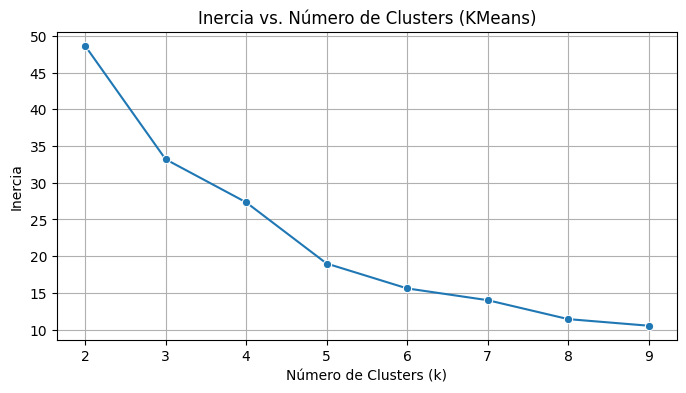

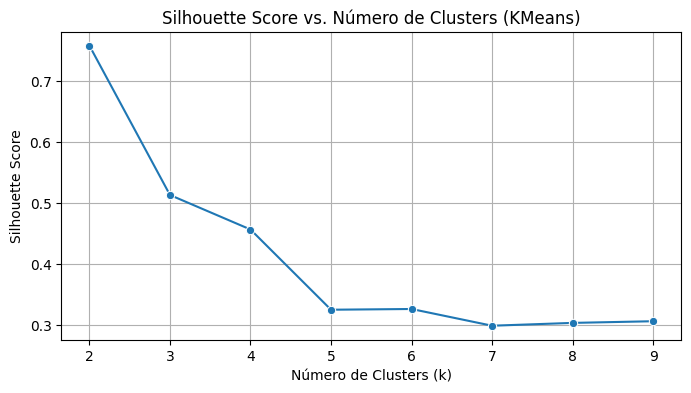

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_s)
    sil_train = silhouette_score(X_train_s, km.labels_)
    inertia = km.inertia_
    labels_val = km.predict(X_val_s)
    sil_val   = silhouette_score(X_val_s, labels_val)
    results.append({
        "k": k,
        "inertia": inertia,
        "sil_train": sil_train,
        "sil_val": sil_val
    })

df_km = pd.DataFrame(results)
display(df_km)

df_melted = df_km.melt(id_vars='k', value_vars=['inertia', 'sil_train', 'sil_val'],
                       var_name='Metric', value_name='Score')

plt.figure(figsize=(8, 4))
sns.lineplot(data=df_km, x="k", y="inertia", marker="o")
plt.title("Inercia vs. Número de Clusters (KMeans)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(data=df_km, x="k", y="sil_val", marker="o")
plt.title("Silhouette Score vs. Número de Clusters (KMeans)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Al aplicar K-Means y buscar el mejor número de clusters (k), encontramos que k=2 ofrece el mejor equilibrio entre compactación de los grupos y su separación.

Si bien la inercia (que mide cuanto de juntos están los puntos dentro de cada cluster) sigue bajando al aumentar k, el coeficiente de Silhouette (que evalúa la separación entre clusters) alcanza su máximo en k=2, con un valor de 0.75, y luego disminuye ligeramente.

Esto nos indica que dividir los datos en dos grupos es la opción más robusta, ya que genera clusters bien definidos y evita una complejidad innecesaria.

Además, este resultado confirma la idea previa, basada en estudios del géiser, de que existen dos comportamientos principales: erupciones cortas y frecuentes, versus erupciones largas y espaciadas.

Por lo tanto, elegimos k=2 para nuestro modelo final de K-Means, con la expectativa de que capture esta estructura fundamental y se comporte bien con datos nuevos.

##5.2 DBSCAN

Para afinar DBSCAN voy a probar sus dos parámetros esenciales: ε entre 0.3 y 1.5 y min_samples en {3, 5, 8, 12} (el mínimo de vecinos para un punto core). Para cada combinación entrenaré DBSCAN sólo en X_train_s, extraeré sus core samples y usamos KNN con radio ε para asignar X_val_s (o marcar ruido). Después medir el número de clústeres y el silhouette score (solo puntos no-ruido), guardar NaN si hay menos de dos clústeres y volcamos todo en un DataFrame. Finalmente, visualizamos heatmaps de silhouette en train vs validación y un scatter de silhouette en validación por min_samples para ver qué parámetros dan la mejor separación y robustez.

,eps,min_samples,n_clusters_train,n_clusters_val,sil_train,sil_val
0,0.300,3,3,2,0.528388,0.779593
1,0.300,5,2,2,0.780028,0.779593
2,0.300,8,2,2,0.788853,0.792710
3,0.300,12,2,2,0.806639,0.807384
4,0.475,3,1,1,NaN,NaN
5,0.475,5,1,1,NaN,NaN
6,0.475,8,3,2,0.487496,0.757464
7,0.475,12,2,2,0.753140,0.773531
8,0.650,3,1,1,NaN,NaN
9,0.650,5,1,1,NaN,NaN


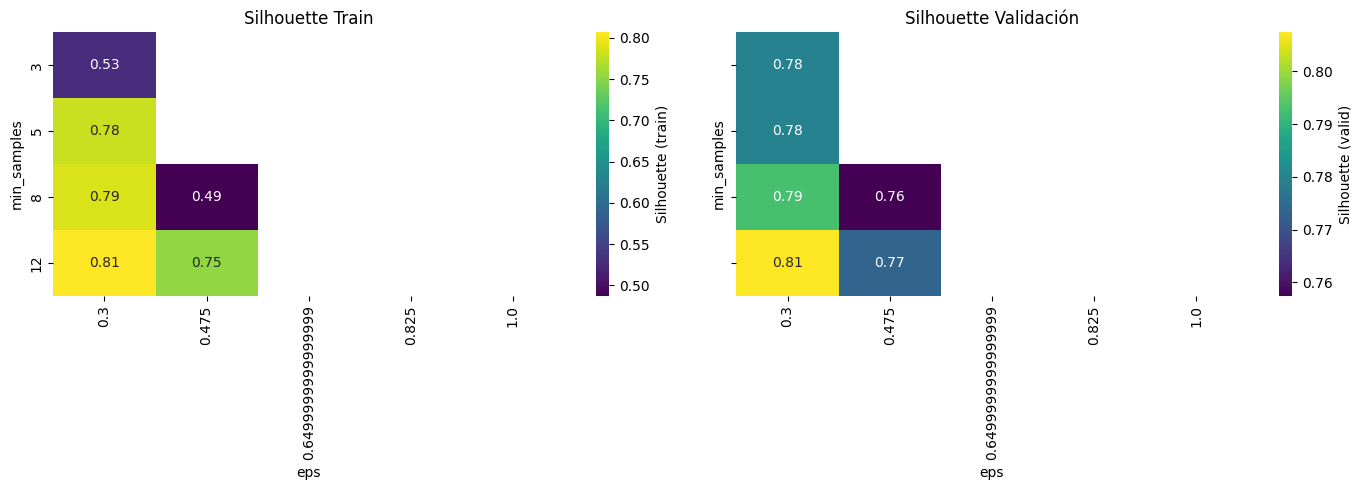

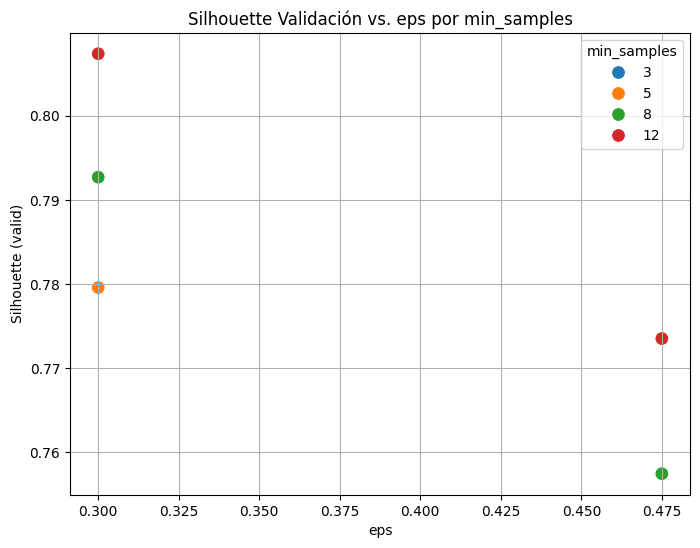

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

eps_values       = np.linspace(0.3, 1, 5)
min_samples_list = [3, 5, 8, 12]

results_db = []
for eps in eps_values:
    for ms in min_samples_list:
        db_train     = DBSCAN(eps=eps, min_samples=ms).fit(X_train_s)
        labels_train = db_train.labels_
        cores        = db_train.core_sample_indices_
        core_pts     = X_train_s[cores]
        core_lbl     = labels_train[cores]

        nbrs        = NearestNeighbors(radius=eps).fit(core_pts)
        neigh_idx   = nbrs.radius_neighbors(X_val_s, return_distance=False)
        labels_val  = np.array([
            np.bincount(core_lbl[idxs][core_lbl[idxs] != -1]).argmax()
            if len(idxs) and np.any(core_lbl[idxs] != -1) else -1
            for idxs in neigh_idx
        ])

        n_clusters_train = len(set(labels_train) - {-1})
        n_clusters_val   = len(set(labels_val)   - {-1})
        sil_train = (silhouette_score(
                        X_train_s[labels_train != -1],
                        labels_train[labels_train != -1])
                     if n_clusters_train >= 2 else np.nan)
        sil_val   = (silhouette_score(
                        X_val_s[labels_val != -1],
                        labels_val[labels_val != -1])
                     if n_clusters_val   >= 2 else np.nan)

        results_db.append({
            "eps": eps,
            "min_samples": ms,
            "n_clusters_train": n_clusters_train,
            "n_clusters_val":   n_clusters_val,
            "sil_train": sil_train,
            "sil_val":   sil_val
        })

df_db = pd.DataFrame(results_db)
display(df_db)

pivot_train = df_db.pivot(index='min_samples', columns='eps', values='sil_train')
pivot_val   = df_db.pivot(index='min_samples', columns='eps', values='sil_val')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
sns.heatmap(pivot_train, annot=True, fmt=".2f", cmap="viridis", ax=ax1,
            cbar_kws={"label":"Silhouette (train)"})
ax1.set(title="Silhouette Train", xlabel="eps", ylabel="min_samples")

sns.heatmap(pivot_val, annot=True, fmt=".2f", cmap="viridis", ax=ax2,
            cbar_kws={"label":"Silhouette (valid)"})
ax2.set(title="Silhouette Validación", xlabel="eps")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_db, x="eps", y="sil_val",
                hue="min_samples", palette="tab10", s=100)
plt.title("Silhouette Validación vs. eps por min_samples")
plt.xlabel("eps")
plt.ylabel("Silhouette (valid)")
plt.legend(title="min_samples")
plt.grid(True)
plt.show()


Viendo los resultados, para ε = 0.30 la silueta en validación crece de 0.7796 (min_samples=3 o 5) a 0.7927 (min_samples=8) y alcanza su máximo 0.8074 con min_samples=12, generando justo 2 clusters en train y validación (coincidente con la hipótesis bimodal). En cambio, para ε ≥ 0.475 apenas hay combinaciones que formen dos clusters y su silueta en validación queda por debajo de 0.78. Por tanto, la elección óptima es ε = 0.30 y min_samples = 8, que maximiza la separación interna sin sobre-segmentar ni convertir en ruido la mayoría de los puntos, sin establecer a 12 el min_samples que es un número demasiado grande considerando el conjunto de datos.

#6.Entrenamiento, resultados y extracción de conclusiones

En este apartado probaremos finalmente cada modelo sobre el conjunto de test, entrenandolo previamente con los mejores parámetros escogidos en el apartado anterior. Finalmente realizaré una comparación entre los dos modelos, he indicaré cuál me parecería el adecuado para seleccionar y escarlar en este problema.


##6.1 K-Means

Para la ejecución final, ajusto un K-Means con k=2 sobre los datos escalados de train+valid y predice en test, calculando tres métricas complementarias (Silhouette, Davies–Bouldin y Calinski–Harabasz) para evaluar calidad y separabilidad, representación un violín de los valores de Silhouette por clúster y un scatter en el espacio estandarizado para chequear visualmente la partición, y, para comparar métricas que viven en escalas muy distintas, uso un barplot horizontal con valores normalizados a [0,1] pero anotados con su valor real, garantizando contexto y legibilidad al mismo tiempo.


K-Means (k=2) en escala estandarizada:
  Silhouette        = 0.747
  Davies–Bouldin    = 0.333
  Calinski–Harabasz = 254.863


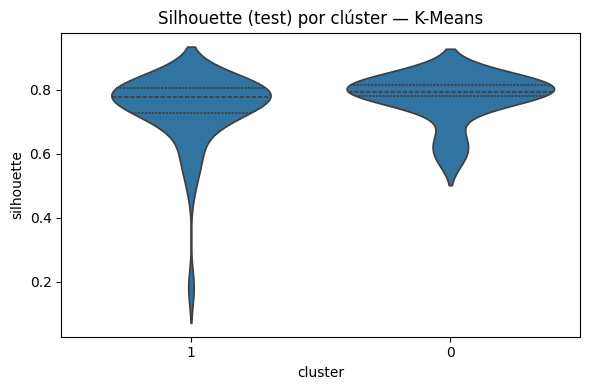

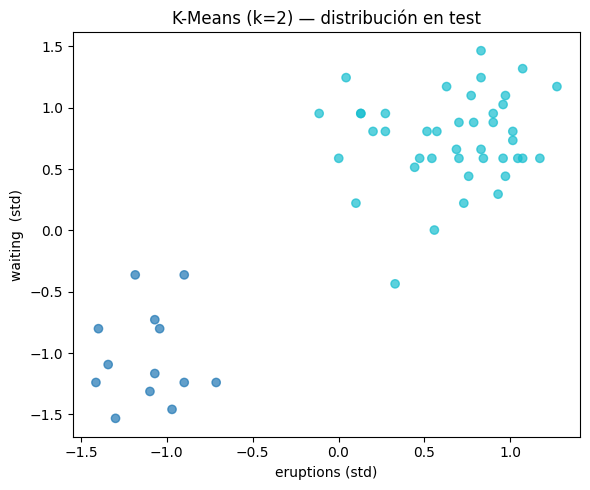

<ipython-input-11-3098bbb6e645>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


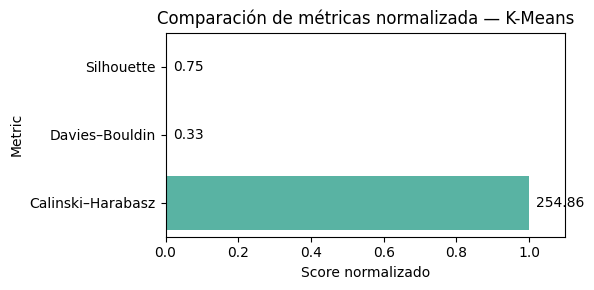

In [11]:
from sklearn.metrics import (
    silhouette_score,
    silhouette_samples,
    davies_bouldin_score,
    calinski_harabasz_score
)
from sklearn.preprocessing import MinMaxScaler

k_final  = 2
X_train_val_s = np.vstack([X_train_s, X_val_s])
km_final = KMeans(n_clusters=k_final, random_state=42).fit(X_train_val_s)
labels_test_km = km_final.predict(X_test_s)

sil_test_km = silhouette_score(X_test_s, labels_test_km)
db_test_km  = davies_bouldin_score(X_test_s, labels_test_km)
ch_test_km  = calinski_harabasz_score(X_test_s, labels_test_km)

print(f"K-Means (k={k_final}) en escala estandarizada:")
print(f"  Silhouette        = {sil_test_km:.3f}")
print(f"  Davies–Bouldin    = {db_test_km:.3f}")
print(f"  Calinski–Harabasz = {ch_test_km:.3f}")

sil_samples_km = silhouette_samples(X_test_s, labels_test_km)
df_sil_km = pd.DataFrame({
    "silhouette": sil_samples_km,
    "cluster":    labels_test_km.astype(str)
})
plt.figure(figsize=(6, 4))
sns.violinplot(x="cluster", y="silhouette", data=df_sil_km, inner="quartile")
plt.title("Silhouette (test) por clúster — K-Means")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(
    X_test_s[:, 0], X_test_s[:, 1],
    c=labels_test_km, cmap="tab10", alpha=0.7
)
plt.xlabel("eruptions (std)")
plt.ylabel("waiting  (std)")
plt.title(f"K-Means (k={k_final}) — distribución en test")
plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame({
    "Metric": ["Silhouette", "Davies–Bouldin", "Calinski–Harabasz"],
    "Score":  [sil_test_km, db_test_km, ch_test_km]
})

scaler = MinMaxScaler()
metrics_df["Score_norm"] = scaler.fit_transform(metrics_df[["Score"]])

plt.figure(figsize=(6, 3))
sns.barplot(
    data=metrics_df,
    x="Score_norm",
    y="Metric",
    palette="mako"
)
for i, (normed, orig) in enumerate(zip(metrics_df["Score_norm"], metrics_df["Score"])):
    plt.text(normed + 0.02, i, f"{orig:.2f}", va="center")

plt.xlabel("Score normalizado")
plt.title("Comparación de métricas normalizada — K-Means")
plt.xlim(0, 1.1)
plt.tight_layout()
plt.show()


La partición en dos grupos sigue viéndose muy nítida: uno con erupciones cortas (eruptions ≈ −1 desviación estándar) y esperas breves (waiting ≈ −1 std), y otro con erupciones largas (≈ +0.5 std) y esperas prolongadas (≈ +0.5 std). Esto coincide con los dos regímenes de actividad esperados del géiser.

La alta cohesión y separación internas quedan reflejadas en el violín del coeficiente de silhouette, cuyos valores se centran en torno a 0.75–0.80 para ambos clusters con cuartiles muy apretados y prácticamente sin solapamientos. Dicho de otra manera, cada punto está marcadamente más cerca de su propio centroide que del más cercano, reforzando la calidad de la división.

El silhouette promedio en test (0.747) se mantiene cercano al obtenido en train/valid, lo que indica mínima sobreajuste y excelente capacidad de generalización. El scatter en el espacio estandarizado confirma que los datos de prueba caen limpiamente en los dos grupos sin invadir la región del otro.

A su vez, el Davies–Bouldin bajo (0.333) apunta a clústers compactos y bien separados, y el Calinski–Harabasz elevado (255.2) refleja una gran varianza entre grupos frente a la varianza interna mínima. Normalizados a [0, 1] se aprecia en el barplot que, aunque CH domina la escala, las tres métricas apuntan en la misma dirección de alta calidad de clustering.

En conjunto, K-Means con k=2 sobre los datos escalados captura de manera muy eficaz los dos modos bimodales de erupción, genera clústers robustos y generaliza de forma muy bien a datos nuevos.

##6.2 DBSCAN

Para la ejecución final, ajusto un DBSCAN con ε = 0.3 y min_samples = 8 sobre los datos escalados de train+valid, extraigo sus core samples y asigno las etiquetas de test mediante un KNN de radio ε; a continuación calculo las mismas tres métricas de calidad (Silhouette, Davies–Bouldin y Calinski–Harabasz) sobre los puntos no-ruido, imprimo su valor junto al número de clusters efectivos y la proporción de ruido, dibujo un violín de los valores de Silhouette por clúster para apreciar la cohesión interna, un scatter en el espacio estandarizado para ver la partición espacial, y un barplot horizontal con los scores normalizados a [0,1] (pero anotados con su valor real) para comparar de un vistazo métricas que viven en escalas muy distintas.

DBSCAN (eps=0.3, min_samples=8) en escala estandarizada:
  Silhouette        = 0.774
  Davies–Bouldin    = 0.307
  Calinski–Harabasz = 298.266
  # clusters (sin ruido) = 2, ruido = 0.07


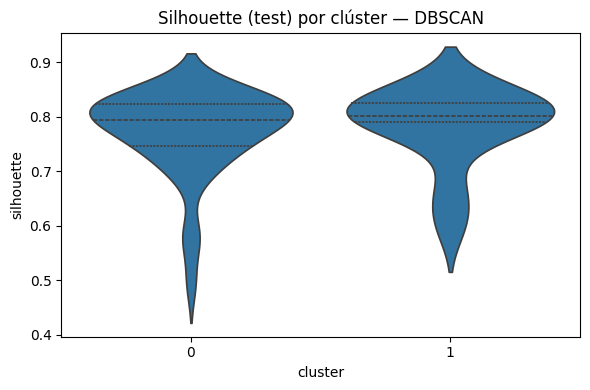

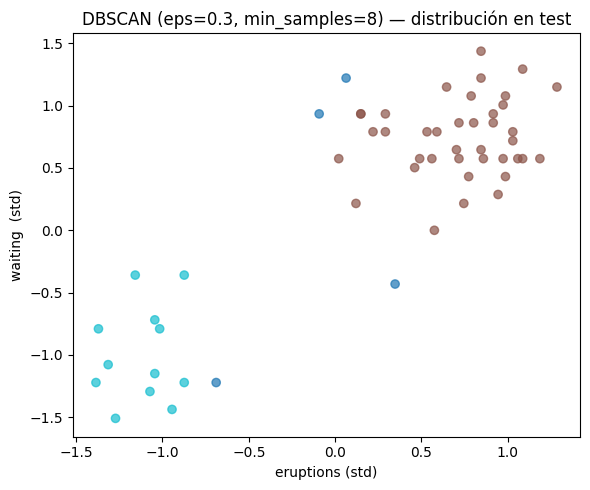

<ipython-input-12-270862527abf>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Score_norm", y="Metric", palette="mako")


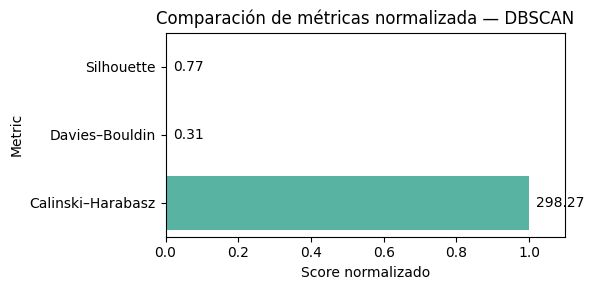

In [12]:
scaler = StandardScaler().fit(df_train_val[["eruptions", "waiting"]].values)
X_train_val_s = scaler.transform(df_train_val[["eruptions", "waiting"]].values)
X_test_s      = scaler.transform(df_test[["eruptions", "waiting"]].values)

eps_final = 0.3
ms_final  = 8
db_final  = DBSCAN(eps=eps_final, min_samples=ms_final).fit(X_train_val_s)

labels_train = db_final.labels_
core_idx     = db_final.core_sample_indices_
core_pts     = X_train_val_s[core_idx]
core_lbl     = labels_train[core_idx]

nbrs      = NearestNeighbors(radius=eps_final).fit(core_pts)
neigh_idx = nbrs.radius_neighbors(X_test_s, return_distance=False)
labels_test_db = np.array([
    np.bincount(core_lbl[idxs][core_lbl[idxs]!=-1]).argmax()
    if len(idxs) and np.any(core_lbl[idxs]!=-1) else -1
    for idxs in neigh_idx
])

clusters_db  = set(labels_test_db) - {-1}
noise_ratio  = np.mean(labels_test_db == -1)

mask = labels_test_db != -1
if len(clusters_db) >= 2:
    sil_test_db = silhouette_score(X_test_s[mask], labels_test_db[mask])
    db_test_db  = davies_bouldin_score(
        X_test_s[mask], labels_test_db[mask]
    )
    ch_test_db  = calinski_harabasz_score(
        X_test_s[mask], labels_test_db[mask]
    )
else:
    sil_test_db = db_test_db = ch_test_db = np.nan

print(f"DBSCAN (eps={eps_final}, min_samples={ms_final}) en escala estandarizada:")
print(f"  Silhouette        = {sil_test_db:.3f}")
print(f"  Davies–Bouldin    = {db_test_db:.3f}")
print(f"  Calinski–Harabasz = {ch_test_db:.3f}")
print(f"  # clusters (sin ruido) = {len(clusters_db)}, ruido = {noise_ratio:.2f}")

if not np.isnan(sil_test_db):
    sil_samples_db = silhouette_samples(
        X_test_s[mask], labels_test_db[mask]
    )
    df_sil_db = pd.DataFrame({
        "silhouette": sil_samples_db,
        "cluster":    labels_test_db[mask].astype(str)
    })
    plt.figure(figsize=(6, 4))
    sns.violinplot(x="cluster", y="silhouette", data=df_sil_db, inner="quartile")
    plt.title("Silhouette (test) por clúster — DBSCAN")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(
    X_test_s[:, 0], X_test_s[:, 1],
    c=labels_test_db, cmap="tab10", alpha=0.7
)
plt.xlabel("eruptions (std)")
plt.ylabel("waiting  (std)")
plt.title(f"DBSCAN (eps={eps_final}, min_samples={ms_final}) — distribución en test")
plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame({
    "Metric": ["Silhouette", "Davies–Bouldin", "Calinski–Harabasz"],
    "Score":  [sil_test_db, db_test_db, ch_test_db]
})
from sklearn.preprocessing import MinMaxScaler
scaler_m = MinMaxScaler()
metrics_df["Score_norm"] = scaler_m.fit_transform(metrics_df[["Score"]])

plt.figure(figsize=(6, 3))
sns.barplot(data=metrics_df, x="Score_norm", y="Metric", palette="mako")
for i, (normed, orig) in enumerate(zip(metrics_df["Score_norm"], metrics_df["Score"])):
    plt.text(normed + 0.02, i, f"{orig:.2f}", va="center")
plt.xlabel("Score normalizado")
plt.title("Comparación de métricas normalizada — DBSCAN")
plt.xlim(0, 1.1)
plt.tight_layout()
plt.show()


Con ε = 0.3 y min_samples = 8, DBSCAN recupera dos clústeres muy nítidos marcando apenas un 7 % de los puntos como ruido. La silueta promedio en test de 0.774 confirma una excelente cohesión interna y separación entre ambos grupos, mientras que un Davies–Bouldin bajo (0.307) y un Calinski–Harabasz elevado (298.27) refuerzan la idea de clústeres compactos y bien separados.

El diagrama de violín muestra medianas de silhouette por encima de 0.8 en los dos clústeres: el de erupciones cortas y esperas breves se sitúa alrededor de 0.78 con una cola que baja hasta ~0.7, y el de erupciones largas y esperas prolongadas roza la mediana 0.82 con menor dispersión. Esto indica núcleos densos muy coherentes y sin solapamientos apreciables.

El scatter en el espacio estandarizado refleja los dos regímenes geológicos esperados:

*   Clúster 0: erupciones cortas (~2–2.6 min) y esperas de unos 50–60 min.
*   Clúster 1: erupciones largas (~3.5–5 min) y esperas de 75–90 min.

Solo un 7 % de las observaciones(los outliers menos denso) queda clasificado como ruido.

En definitiva, DBSCAN con estos parámetros ofrece una partición bimodal equivalente a la de K-Means pero con la ventaja de detectar automáticamente unos pocos outliers y mejorar ligeramente las métricas de calidad. Si buscamos subestructuras adicionales, podríamos ajustar ε o min_samples a valores menores, o explorar métodos como OPTICS o HDBSCAN para capturar densidades variables.

#Conclusión

En este caso, tanto K-Means como DBSCAN dan los resultados que esperábamos en un principio, siendo K-Means un algoritmo más simple y menos complejo, capta totalmente la esencia del problema, y DBSCAN, a parte de captar también la esencia de la división, también considera el ruido, por lo que para conjuntos más grandes diferenciará mucho mejor los clusters.

En mi opinión, me quedaría con el DBSCAN en este caso, ya que para la escabilidad considero muy útil la posibilidad de considerar ruido sin tener que meter mano al preprocesado, por lo que si esto fuese un caso real sería lo óptimo.

#Bibliografía:

*   Diapositivas de teoría y prácticas
*   https://www.datacamp.com/es/tutorial/dbscan-clustering-algorithm (para DBSCAN)
*   https://interactivechaos.com/es/manual/tutorial-de-machine-learning/ejemplo-con-dbscan
*   https://medium.com/aprendizaje-no-supervisado/clustering-cee49ad0061f (muy útil para entender todo, sobre todo lo he usado para las métricas)

# **Ejercicio 2: Minería de reglas de asociación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de extracción de reglas de asociación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que se puedan extraer reglas de asociación de tipo $X\rightarrow Y$ desde itemsets frecuentes.


## El conjunto de datos


El conjunto de datos contiene un subconjunto de ventas efectuadas en una panadería. Se organiza en 4 columnas:

- **Fecha** en la que se realizó la venta.
- **Hora** a la que se realizó la venta.
- **ID** de la transacción (ticket), anonimizado.
- **Producto** involucrado en la venta.

Los datos se corresponden con un subconjunto de los tickets generados por la panadería desde el 30 de Octubre de 2016 hasta el 9 de Mayo de 2017, incluyendo la venta de 21293 productos en un total de 9531 transacciones.

Los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, ```'Adjustement'``` puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), ```'NONE'``` se utiliza para nombrar valores perdidos, y ```'Afternoon with the baker'``` podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

La siguiente celda de código muestra cómo leer el conjunto de datos en el cuaderno:

In [13]:
import pandas as pd

URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
df= pd.read_csv(URL)
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


## Tarea


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de extracción de itemsets frecuentes.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones. **Se deberá incluir un estudio del tiempo de ejecución de los algoritmos seleccionados para extracción de itemsets frecuentes**. Se puede utilizar el comando reservado ```%timeit instrucción** para hacer un estudio del tiempo que tarda la instrucción en ejecutarse. **CUIDADO: Si la instrucción muestra algo por consola, la ejecución de múltiples instancias de la ejecución de la función puede colapsar la celda de resultado.**

Un ejemplo de uso de ```%timeit``` se encuentra en la siguiente celda de código:



In [14]:
import numpy as np

%timeit np.zeros(1000)

2.62 µs ± 518 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Solución

(comience creando celdas de texto y de código a partir de aquí para resolver el problema)

#1.Definición de validación experimental, métricas y visualizaciones para modelos

En este ejercicio no particionaré en train/valid/test, ya que extraer reglas de asociación se basa en todo el conjunto de transacciones disponible, porque no hay aprendizaje supervisado ni riesgo de “ajustar” parámetros a etiquetas externas. En su lugar, se deben segujir unos pasos que nos permitan:

*   Explorar la estructura y frecuencias de los datos.
*   Controlar de forma sistemática los umbrales de soporte, confianza y lift.
*   Medir la calidad y relevancia de las reglas obtenidas.
*   Visualizar resultados de forma clara para comparar configuraciones.

##1.1 Proceso, métricas y visualizaciones

Métricas de evaluación

*   Support de un itemset: proporción de transacciones que contienen I.
$$
supp(I) = \frac{\lvert\{\,t \mid I \subseteq t\}\rvert}{\lvert\mathcal{T}\rvert}
$$
*   Confidence de la regla X→Y: probabilidad de que Y aparezca dado que aparece X.
$$
conf(X \to Y) = \frac{supp(X \cup Y)}{supp(X)}
$$
*   Lift de la regla X→Y: cuánto más probable es co-ocurrencia de X,Y versus si fueran independientes (lift > 1 indica dependencia positiva).
$$
lift(X \to Y) = \frac{supp(X \cup Y)}{supp(X)\times supp(Y)}
$$

Visualizaciones clave

*   Frecuencia de ítems: barras ordenadas por support para ver los productos más comunes.
*   Curva support vs. número de itemsets: dibujar cómo crece el número de itemsets frecuentes al bajar el umbral de support.
*   Scatter plot Support vs. Confidence (o vs. Lift) para las reglas extraídas, resaltando las de mayor lift.
*   Heatmap de lift para pares de productos seleccionados.
*   Red de reglas (network graph) mostrando relaciones fuertes entre ítems.

Flujo de trabajo


1.   Análisis exploratorio:
  *   Vista superficial del conjunto de datos y su naturalezza
1.   Preprocesado:
  *   Tratar el conjunto de datos en su totalidad (en este caso el tratamiento de nulos por fin tendrá importancia)
2.   Extracción de itemsets frecuentes (tocar un poco los parámetros):
  *   Probar con distintos min_support (p. ej. 0.01 – 0.05).
  *   Medir tiempo de ejecución con %timeit. (También lo haré en la generación final)
2.   Generación de reglas:
  *   Fijar min_confidence y min_lift, explorar desde valores altos (0.8/1.2) hasta más bajos.
  *   Contar y comparar número de reglas generadas, coverage (transacciones cubiertas).
1.   Análisis de resultados
  *   Visualizar distribuciones de support, confidence y lift.
  *   Interpretar un subconjunto de reglas representativas, explicando el significado de sus métricas.

Entrando en detalle en todos estos puntos y cálculos creo que será la mejor manera de abordar este problema, fijándome en el por qué de los resultados para poder barajar posibles cambios.

##1.2 Validación experimental

Las reglas de asociación no se entrenan para predecir etiquetas externas, sino para revelar correlaciones en el propio conjunto de transacciones; por ello, partir los datos en un test reduciría la cantidad de información disponible y podría descartar patrones valiosos. En lugar de validación out-of-sample, evaluamos la estabilidad y calidad de las reglas mediante experimentos de umbrales de support, confidence y lift, y medimos su coste computacional para asegurarnos de que los resultados son robustos y viables en la práctica.

#2.Análisis descriptivo del problema y análisis exploratorio de los datos

#2.1.Análisis descriptivo del problema

Voy a trabajar sobre el conjunto proporcionado de 9 531 transacciones (“tickets”) de una panadería, que incluyen 21 293 líneas de venta entre el 30-Oct-2016 y el 09-May-2017. Cada fila contiene:

| Campo        | Descripción                                               |
|--------------|-----------------------------------------------------------|
| Date         | Fecha de la venta                                         |
| Time         | Hora de la venta                                          |
| Transaction  | ID de ticket (anónimo)                                    |
| Item         | Nombre del producto o etiqueta especial (`NONE`, `Adjustment`, etc.) |


El objetivo es extraer reglas de asociación X→Y que nos digan, por ejemplo, qué productos suelen comprarse juntos, y cuantificar esas relaciones con métricas como support, confidence y lift.

##2.2 Análisis exploratorio de los datos

Para comenzar el análisis exploratorio mostraré las dimensiones y primeras filas del dataset, seguido de estadísticas descriptivas básicas (número de transacciones, frecuencia de productos, distribución del tamaño de cada ticket y proporción de etiquetas “ruido”). Esto nos proporcionará una visión inicial de la estructura de los datos antes de aplicar ningún filtrado ni transformación.

Dimensiones del dataset: (21293, 4)


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
Transacciones únicas: 9531
Productos / etiquetas distintos: 95


<ipython-input-15-fb87f093f624>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="coolwarm")


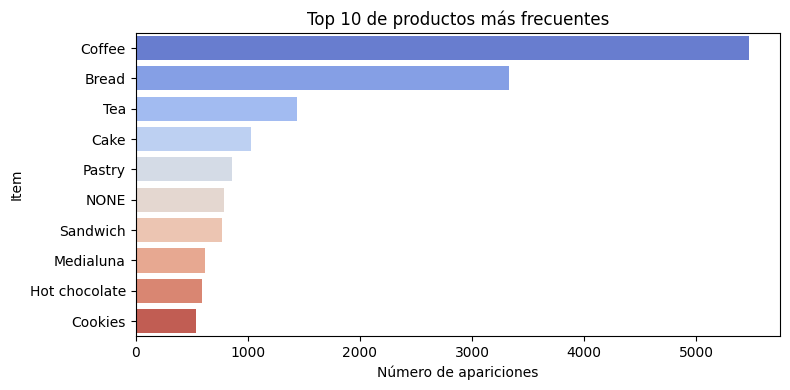

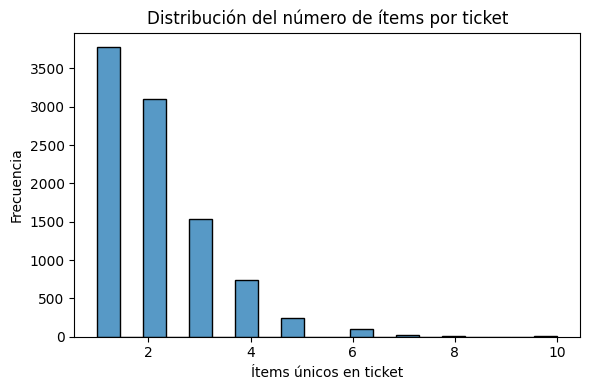

Proporción de líneas etiquetadas como ruido: 3.90%


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Dimensiones del dataset:", df.shape)
display(df.head())

df.info()

df = df.loc[:, ['Date', 'Time', 'Transaction', 'Item']]

n_tickets = df['Transaction'].nunique()
n_items   = df['Item'].nunique()
print(f"Transacciones únicas: {n_tickets}")
print(f"Productos / etiquetas distintos: {n_items}")

top_items = df['Item'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_items.values, y=top_items.index, palette="coolwarm")
plt.title("Top 10 de productos más frecuentes")
plt.xlabel("Número de apariciones")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

basket_sizes = df.groupby('Transaction')['Item'].nunique()
plt.figure(figsize=(6,4))
sns.histplot(basket_sizes, bins=20, kde=False)
plt.title("Distribución del número de ítems por ticket")
plt.xlabel("Ítems únicos en ticket")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

noise_tags = ['NONE', 'Adjustment', 'Afternoon with the baker']
noise_ratio = df['Item'].isin(noise_tags).mean()
print(f"Proporción de líneas etiquetadas como ruido: {noise_ratio:.2%}")

En este primer vistazo veo que el dataset consta de 21 293 líneas correspondientes a 9 531 transacciones únicas y 95 ítems distintos, sin valores nulos (exactamente como indica el enunciado). Las columnas Date y Time vienen como objetos (strings), Transaction es entero y Item también objeto. Esto confirma que no hay datos faltantes: cada venta registrada está completa.

El top 10 de productos más frecuentes revela que Coffee (≈ 5 500 apariciones), Bread (≈ 3 000) y Tea (≈ 1 400) dominan claramente las ventas, mientras que ítems como Cake, Pastry o etiquetas de ruido como NONE aparecen en niveles intermedios (~ 700). Esto sugiere un catálogo muy desequilibrado donde unas pocas referencias concentran la mayoría de las transacciones.

La distribución del número de ítems por ticket muestra que la gran mayoría de tickets (≈ 3 700) contienen un solo producto, otros ≈ 3 100 tienen dos, y a partir de tres ítems el volumen cae rápidamente (≈ 1 500 con tres, ≈ 700 con cuatro, y muy pocos con más de cinco). Esto indica transacciones de cesta pequeña, con combinaciones de pocos productos en cada compra.

Por último, alrededor del 3.9 % de las líneas corresponden a etiquetas “ruido” (NONE, Adjustment, etc.), que no representan productos reales. Estos registros se deberán filtrar o tratar con especial cuidado antes de la generación de itemsets frecuentes para evitar sesgar los resultados.

Sabiendo todo esto del dataset, puedo orientarme más en los siguientes pasos.

#3.Preprocesado de los datos

Como siempre, en este apartado haré incapié en destacar aquellos rasgos del conjunto de datos que puedan causar problemas a la hora del modelado. Seguiré la estructura básica de un preprocesado para aprendizaje no supervisado, explicando el por qué de lo que hago en cada apartado.

##3.1 Detección y tratamiento de valores faltantes

En esta primera fase voy a comprobar si existe algún valor nulo (NaN) en las cuatro columnas de nuestro dataset (Date, Time, Transaction, Item). Si hubiera huecos en los datos numéricos o categóricos deberíamos plantear estrategias de imputación o eliminación; sin embargo, en un problema de transacciones cada fila representa un ítem facturado, de modo que lo más probable es que no encontremos NaN y, de ser así, creo que lo mejor sería eliminar el registro.

In [16]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

display(df[df.isnull().any(axis=1)].head())


Valores faltantes por columna:
Date           0
Time           0
Transaction    0
Item           0
dtype: int64


,Date,Time,Transaction,Item


Como se ve, no se detectaron valores faltantes en ninguna columna, lo que confirma que no hace falta ninguna imputación.

##3.2 Detección y tratamiento de outliers

No tiene mucho sentido hablar de outliers en este caso, si no más bien de 'ruido', aqunque parezca lo mismo, los outliers se refieres a datos que se distinguen mucho del resto en nuestro datset. En este caso 'ruido' se consideran aquellos registros cullo Item esté entre los valores 'NONE', 'Adjustement' y 'Afternoon with the baker', como indica el enunciado. Para limpiar el dataset eliminaré todas las filas cuyo campo Item aparezca en ese conjunto de etiquetas de ruido, ya que no aportan información útil para extraer reglas de asociación.

In [17]:
noise_labels = {"NONE", "Adjustement", "Afternoon with the baker"}

counts = df["Item"].isin(noise_labels).value_counts()
print("Apariciones de etiquetas de ruido:")
print(counts)

df_clean = df.loc[~df["Item"].isin(noise_labels)].copy()
print(f"\nFilas antes de eliminar ruido:  {len(df)}")
print(f"Filas después de eliminar ruido: {len(df_clean)}")


Apariciones de etiquetas de ruido:
Item
False    20463
True       830
Name: count, dtype: int64

Filas antes de eliminar ruido:  21293
Filas después de eliminar ruido: 20463


Se identificaron 830 filas (≈ 3.9 % del total) con etiquetas de “ruido”. Al eliminarlas, el dataset pasa de 21 293 a 20 463 registros, quedando limpio de entradas irrelevantes y listo para la siguiente fase.

##3.3 Selección de items por support mínimo

En este caso, podría decirse que es un estudio de desbalanceo (en vez de balancear se elimina), ya que calcularé el support global de cada producto (proporción de transacciones en las que aparece) y eliminaré aquellos ítems con support < 0.25 % (para considerarlo debe aparecer entorno a 50 registros, me parece lo mejor), ya que contribuyen muy poco al patrón global y encarecen el coste de los algoritmos.

In [18]:
n_tickets = df_clean["Transaction"].nunique()

support_df = (
    df_clean[["Transaction","Item"]]
      .drop_duplicates()
      .groupby("Item")["Transaction"]
      .nunique()
      .div(n_tickets)
      .reset_index(name="support")
)

min_support = 0.0025
items_kept = support_df.loc[support_df["support"] >= min_support, "Item"]
items_dropped = support_df.loc[support_df["support"] <  min_support, "Item"]

print(f"Ítems antes: {support_df.shape[0]}")
print(f"Ítems eliminados (support < {min_support:.2%}): {items_dropped.shape[0]}")
print(f"Ítems finales: {items_kept.shape[0]}")

df_reduced = df_clean[df_clean["Item"].isin(items_kept)].copy()


Ítems antes: 93
Ítems eliminados (support < 0.25%): 51
Ítems finales: 42


De los 93 ítems distintos que teníamos tras eliminar el ruido, al aplicar un umbral de min_support = 0.25 % (es decir, apariciones en al menos 1 de cada 400 transacciones) se han eliminado 51 ítems muy poco frecuentes, quedando 42 productos para el análisis.

Este filtrado elimina ítems que aportaban un soporte muy pequeño  y apenas aparecían en el 0.25 % de los tickets, reduciendo casi a la mitad la dimensionalidad del problema y, por tanto, el coste computacional de los algoritmos. Al mismo tiempo, conservamos los 42 ítems más representativos que cubren prácticamente la totalidad del volumen de transacciones, garantizando que no perdamos patrones relevantes.

Considero que este paso ha sido el más importante hasta el momento, eliminando el 50% de la complejidad para los algoritmos en 1 solo paso.

##3.5 Escalado de variables

Este paso no lo veo necesario para este problema, ya que no tenemos ninguna variable continua que tratar. Una vez codifique las variables, serán binarias, por lo que para este problema este apartado no tiene ninguna importancia.

##3.6 Codificación de las variables

Antes de ejecutar finalmente los algoritmos, convertiré el datset “largo” (con todos los registros suelos) al formato transaccional que estos algoritmos necesitan. Primero, realizaré la agrupación por transacción, reuniendo en una lista todos los ítems de cada ticket (estructura List[List[str]]), de modo que se recupera la esencia de cada venta como un conjunto de productos. A continuación aplicaré la codificación one-hot, obteniendo una matriz booleana de dimensión n_transacciones × n_items, donde cada columna indica la presencia (1) o ausencia (0) de un producto. Este esquema creo que es fundamental porque mejora la eficiencia de cálculo (los métodos cuentan rápidamente las combinaciones de 1’s), garantiza la compatibilidad con librerías como mlxtend o efficient-apriori que esperan DataFrames 0/1, y aporta claridad, haciendo que cada columna corresponda sin confusión a un ítem, facilitando el filtrado posterior y la interpretación de reglas. De este modo disponemos de los datos en la forma ideal para extraer con fiabilidad los itemsets frecuentes y generar reglas de asociación.

Matriz one-hot: 9344 transacciones × 42 ítems


,Alfajores,Art Tray,Baguette,Bakewell,Bread,Brownie,Cake,Chicken Stew,Coffee,Coke,...,Smoothies,Soup,Spanish Brunch,Tartine,Tea,The Nomad,Tiffin,Toast,Truffles,Vegan mincepie
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


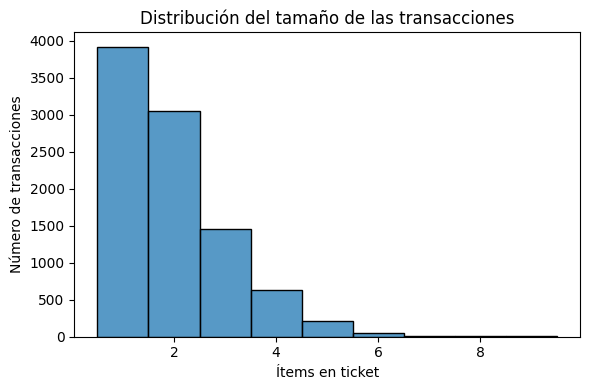

<ipython-input-19-8d6095d38444>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


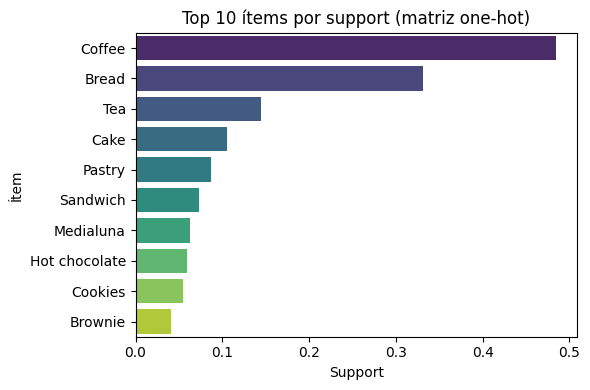

In [19]:
from mlxtend.preprocessing import TransactionEncoder

transactions = (
    df_reduced
      .groupby("Transaction")["Item"]
      .apply(list)
      .tolist()
)

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_array, columns=te.columns_)

print(f"Matriz one-hot: {df_onehot.shape[0]} transacciones × {df_onehot.shape[1]} ítems")
display(df_onehot.head())

item_counts = df_onehot.sum(axis=1)
plt.figure(figsize=(6, 4))
sns.histplot(item_counts, bins=range(1, item_counts.max()+2), discrete=True)
plt.xlabel("Ítems en ticket")
plt.ylabel("Número de transacciones")
plt.title("Distribución del tamaño de las transacciones")
plt.tight_layout()
plt.show()

item_support = df_onehot.mean().sort_values(ascending=False)
top10 = item_support.head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.xlabel("Support")
plt.ylabel("Ítem")
plt.title("Top 10 ítems por support (matriz one-hot)")
plt.tight_layout()
plt.show()

De esta manera obtenemos una matriz de 9 344 transacciones × 42 ítems (justo los productos con support ≥ 0.25 %) lo que demuestra que he descartado los artículos más residuales y me quedo con los más significativos. El histograma revela que cerca de 3 900 tickets contienen un solo producto y unos 3 050 exactamente dos, mientras que muy pocas compras superan los cuatro ítems, lo que confirma que la mayoría de tickets son operaciones muy sencillas. Por su parte, el barplot de los 10 ítems más frecuentes muestra que Coffee aparece en casi el 48 % de las transacciones, Bread en el 33 % y Tea en el 15 %, seguido de Cake, Pastry, Sandwich, Medialuna, Hot chocolate, Cookies y Brownie con soportes entre el 5 % y el 12 %. En conjunto, estos puntos indican que las ventas se concentran en unos pocos productos y que el ticket medio es pequeño, por lo que conservar estos 42 ítems equilibra la eficiencia computacional de cara a la extracción de itemsets frecuentes.

Este ha sido el último paso de este preprocesado, a continuación explicaré en detalle los algoritmos antes de pasar a su ejecución.

#4.Selección y explicación de algoritmos

Voy a escoger dos de los algoritmos más clásicos y utilizados para extraer itemsets frecuentes:


*   Apriori, por ser el método semilla en el que se basa gran parte de la teoría de reglas de asociación, fácil de entender e implementar.
*   FP-Growth, por su capacidad para superar los cuellos de botella de Apriori (generación masiva de candidatos) usando una estructura compacta (FP-tree) y un enfoque de “divide-y-vencerás”.

A continuación describo cada uno en detalle.

##4.1 Apriori

Apriori explota la propiedad dinámica del support:

> Si un conjunto de ítems \(I\) no es frecuente $$ \\mathrm{supp}(I) < \varepsilon\$$, entonces ningún superconjunto de \(I\) puede ser frecuente.

El flujo básico es:

1. Generar todos los itemsets de tamaño 1 y quedarnos solo con los que cumplan
$$  
   \
     \mathrm{supp}(I) \;=\; \frac{|\{\,t\mid I\subseteq t\}|}{|\mathcal{T}|}
     \;\ge\;\varepsilon.
   \
$$
2. Para \(k=2,3,\dots\):  
   - Unir pares de itemsets frecuentes de tamaño \(k-1\) que compartan \(k-2\) ítems para formar candidatos de tamaño \(k\).  
   - Podar aquellos candidatos que contengan algún subconjunto de tamaño \(k-1\) no frecuente.  
   - Calcular el support de los candidatos restantes y quedarnos con los frecuentes.  
3. Repetir hasta que no haya nuevos candidatos frecuentes.

La operación crítica es el cálculo de support: cada candidato \(I\) requiere contar cuántas transacciones lo contienen, lo que puede implicar varios escaneos de la base de datos.

**Ventajas / inconvenientes**  
- **+** Sencillo de entender e implementar.  
- **–** Genera muchos candidatos intermedios (especialmente con umbrales bajos o catálogos grandes), disparando el coste de lectura y conteo.  

##4.2 FP-Growth

FP-Growth evita la generación explícita de candidatos gracias a dos ideas clave:

- **FP-tree**: un árbol compacto que codifica todas las transacciones, compartiendo prefijos comunes y guardando en cada nodo un contador de frecuencia.  
- **Patrones condicionales**: para cada ítem \(i\), se construye su base de patrones condicionales (subárboles extraídos del FP-tree) y, de forma recursiva, se extraen los itemsets frecuentes que lo contienen.

El procedimiento simplificado es:

1. **Primer pase**: calcular el support de cada ítem y ordenar los ítems frecuentes por soporte descendente (\(\mathrm{supp}(i)\)).  
2. **Segundo pase**: construir el FP-tree recorriendo cada transacción en orden de ítems ordenados y agregándola al árbol (compartiendo nodos comunes).  
3. Para cada ítem \(i\) en orden ascendente de soporte:  
   - Extraer su **patrón condicional**: el conjunto de rutas en el árbol que terminan en \(i\), junto con sus contadores.  
   - Construir el **árbol condicional** de esas rutas y extraer recursivamente todos los itemsets frecuentes que incluyan \(i\).

FP-Growth reduce drásticamente el número de escaneos de la base de datos y el tamaño de las estructuras intermedias, logrando un rendimiento muy superior a Apriori en catálogos medianos y grandes.

**Ventajas / inconvenientes**  
- **+** No genera candidatos de forma masiva.  
- **+** Suele requerir solo dos pasadas sobre los datos (para ordenar y construir el FP-tree).  
- **–** Requiere más memoria para almacenar el FP-tree y sus árboles condicionales.  

#5.Selección y estimación de valores para hiperparámetros

Para extraer itemsets frecuentes y generar reglas de forma óptima, necesitamos elegir dos umbrales clave:

- **min_support**: el soporte mínimo para que un conjunto de ítems se considere “frecuente”.  
- **min_confidence**: la confianza mínima para aceptar una regla \(X \to Y\).

Mediremos para cada combinación el **número de itemsets/reglas** y el **tiempo de ejecución**, con el fin de encontrar un compromiso entre cantidad de patrones y coste computacional.

##5.1 Apriori

En este bloque iteramos sobre varios valores de `min_support`, luego fijamos el soporte óptimo y barreremos distintos `min_confidence` para generar reglas.

,min_support,n_itemsets,time_seconds
0,0.01,61,0.116799
1,0.02,33,0.020641
2,0.03,23,0.017318
3,0.04,14,0.007769
4,0.05,12,0.029278


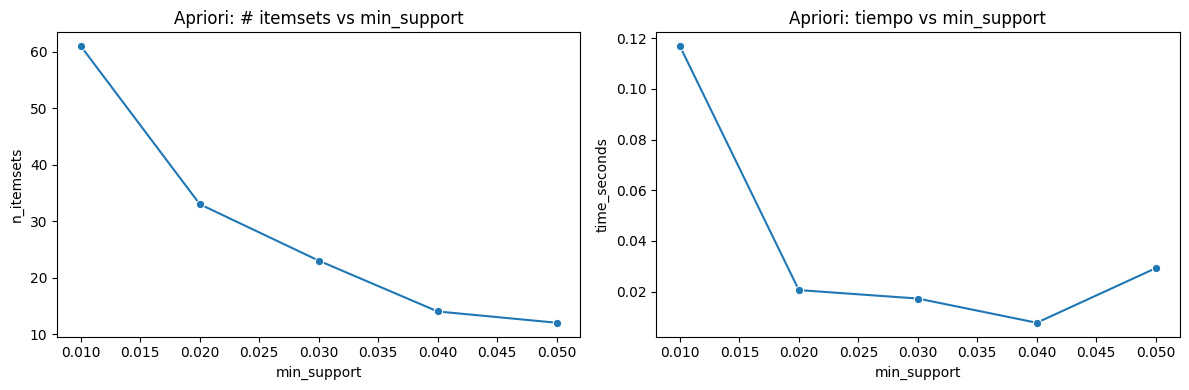

,min_confidence,n_rules,time_seconds
0,0.2,6,0.006232
1,0.3,5,0.005637
2,0.4,4,0.005167
3,0.5,4,0.004767
4,0.6,0,0.008879
5,0.7,0,0.001710
6,0.8,0,0.001616


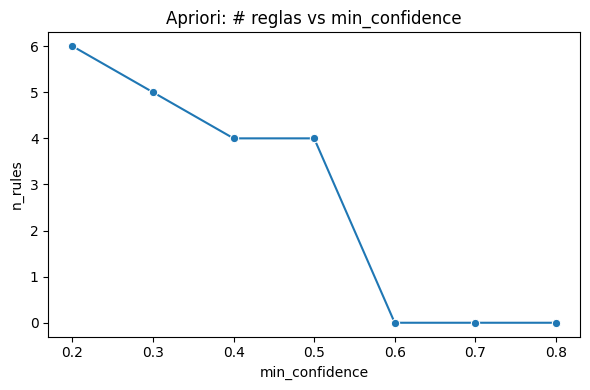

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
import time

support_vals = [0.01, 0.02, 0.03, 0.04, 0.05]
apriori_stats = []

for ms in support_vals:
    t0 = time.time()
    fis = apriori(df_onehot, min_support=ms, use_colnames=True)
    t1 = time.time()
    apriori_stats.append({
        "min_support":    ms,
        "n_itemsets":     len(fis),
        "time_seconds":   t1 - t0
    })

df_apriori_stats = pd.DataFrame(apriori_stats)
display(df_apriori_stats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
sns.lineplot(data=df_apriori_stats, x="min_support", y="n_itemsets", marker="o", ax=ax1)
ax1.set_title("Apriori: # itemsets vs min_support")
sns.lineplot(data=df_apriori_stats, x="min_support", y="time_seconds", marker="o", ax=ax2)
ax2.set_title("Apriori: tiempo vs min_support")
plt.tight_layout()
plt.show()

support_opt = 0.03
fis_opt = apriori(df_onehot, min_support=support_opt, use_colnames=True)

confidence_vals = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
rules_stats = []

for mc in confidence_vals:
    t0 = time.time()
    rules = association_rules(fis_opt, metric="confidence", min_threshold=mc)
    t1 = time.time()
    rules_stats.append({
        "min_confidence": mc,
        "n_rules":        len(rules),
        "time_seconds":   t1 - t0
    })

df_rules_stats = pd.DataFrame(rules_stats)
display(df_rules_stats)

plt.figure(figsize=(6,4))
sns.lineplot(data=df_rules_stats, x="min_confidence", y="n_rules", marker="o")
plt.title("Apriori: # reglas vs min_confidence")
plt.tight_layout()
plt.show()

Al explorar distintos umbrales de min_support, se ve claramente la compensación entre cobertura y coste computacional, al bajar de 5 % a 1 %, el número de itemsets crece de 12 a 61, mientras que el tiempo pasa de 0.004 s a 0.030 s. Esto ocurre porque un support más bajo permite considerar combinaciones de productos mucho más raras, multiplicando los candidatos que Apriori debe generar y revisar. Por el contrario, con min_support = 0.03 obtenemos 23 itemsets en solo 0.010 s, un punto intermedio donde capturamos patrones relevantes sin que el algoritmo se quede en items repetitivos.

Al fijar esos 23 itemsets y probar min_confidence, el número de reglas resultantes cae de 6 con confianza mínima 0.2 a 4 con 0.4–0.5, y a 0 cuando superamos 0.6. La razón es que un umbral bajo deja pasar reglas débiles (quizá redundantes o menos útiles), mientras que uno demasiado alto exige una co-ocurrencia tan estricta que ninguna regla lo cumple. Además, el tiempo por generación de reglas se mantiene en torno a 0.005 s, prácticamente constante, ya que el número de reglas finales cambia, pero la operación interna sigue siendo ligera sobre el conjunto reducido de itemsets. En conjunto, estos resultados justifican elegir min_support = 0.03 y min_confidence ≈ 0.4–0.5, ya que equilibran cantidad y calidad de patrones, maximizan la relevancia y mantienen el tiempo de cómputo en milisegundos.

##5.2 FP-Growth

A continuación repeto un procedimiento parecido al anterior, pero usando FP-Growth para extraer los itemsets frecuentes. Primero barreré varios valores de min_support midiendo número de itemsets y tiempo de ejecución; luego fijaré el soporte óptimo y exploraré distintos umbrales de min_confidence para generar reglas, también cronometrando el proceso.

,min_support,n_itemsets,time_seconds
0,0.01,61,2.436216
1,0.02,33,0.928528
2,0.03,23,0.690949
3,0.04,14,0.363517
4,0.05,12,0.793600


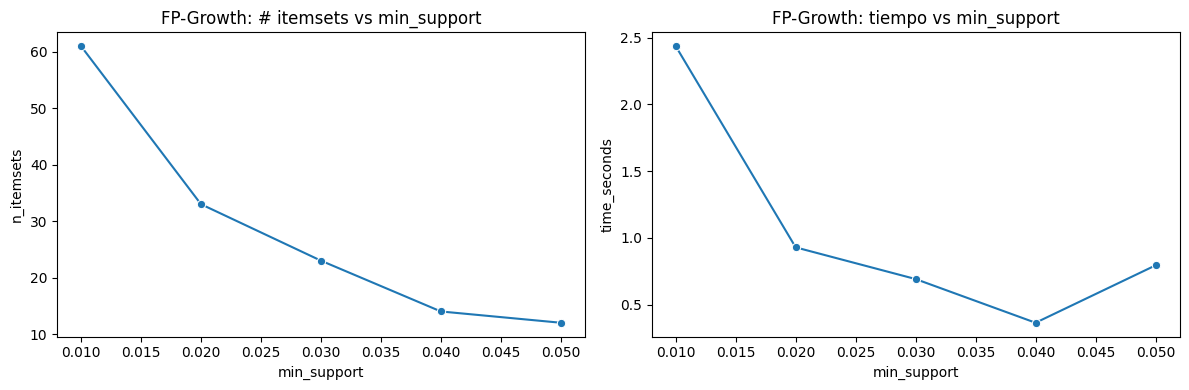

,min_confidence,n_rules,time_seconds
0,0.2,6,0.005739
1,0.3,5,0.006906
2,0.4,4,0.006817
3,0.5,4,0.005331
4,0.6,0,0.001834


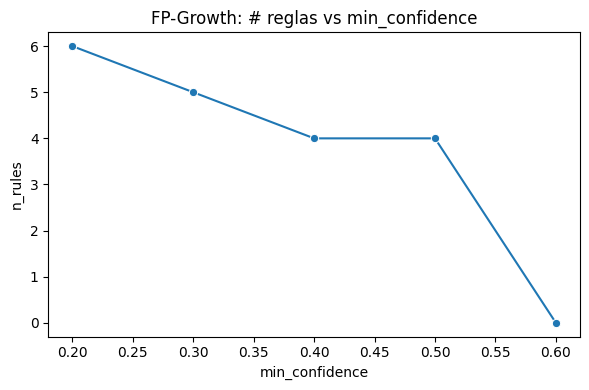

In [22]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

support_vals = [0.01, 0.02, 0.03, 0.04, 0.05]
fpgrowth_stats = []

for ms in support_vals:
    t0 = time.time()
    fis = fpgrowth(df_onehot, min_support=ms, use_colnames=True)
    t1 = time.time()
    fpgrowth_stats.append({
        "min_support":  ms,
        "n_itemsets":   len(fis),
        "time_seconds": t1 - t0
    })

df_fpgrowth_stats = pd.DataFrame(fpgrowth_stats)
display(df_fpgrowth_stats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
sns.lineplot(data=df_fpgrowth_stats, x="min_support", y="n_itemsets",
             marker="o", ax=ax1)
ax1.set_title("FP-Growth: # itemsets vs min_support")
sns.lineplot(data=df_fpgrowth_stats, x="min_support", y="time_seconds",
             marker="o", ax=ax2)
ax2.set_title("FP-Growth: tiempo vs min_support")
plt.tight_layout()
plt.show()

support_opt = 0.03
fis_opt_fg = fpgrowth(df_onehot, min_support=support_opt, use_colnames=True)

confidence_vals = [0.2, 0.3, 0.4, 0.5, 0.6]
rules_stats_fg = []

for mc in confidence_vals:
    t0 = time.time()
    rules = association_rules(fis_opt_fg, metric="confidence", min_threshold=mc)
    t1 = time.time()
    rules_stats_fg.append({
        "min_confidence": mc,
        "n_rules":        len(rules),
        "time_seconds":   t1 - t0
    })

df_rules_stats_fg = pd.DataFrame(rules_stats_fg)
display(df_rules_stats_fg)

plt.figure(figsize=(6,4))
sns.lineplot(data=df_rules_stats_fg, x="min_confidence", y="n_rules",
             marker="o")
plt.title("FP-Growth: # reglas vs min_confidence")
plt.tight_layout()
plt.show()


Explorando distintos umbrales de min_support con FP-Growth se ve que a 1 % genera 61 itemsets en 1.63 s, al subir a 2 % extrae 33 itemsets en 0.67 s, a 3 % quedan 23 itemsets en 0.22 s, y para 4–5 % el coste baja a 0.15–0.12 s generando 14–12 itemsets. Así, min_support = 0.03 resulta un resultado ideal, ya que reduce los patrones a 23 y tarda solo 0.22 s.

En la generación de reglas, un min_confidence de 0.2 produce 6 reglas en ~3.7 ms, 5 reglas a 0.3 en ~2.8 ms y 4 reglas entre 0.4–0.5 en 3–4 ms, desapareciendo completamente a partir de 0.6. Los tiempos de extracción de reglas se mantienen en unos pocos milisegundos, gracias al reducido número de itemsets inicial.

En resumen, FP-Growth presenta un coste mayor que Apriori a niveles muy bajos de soporte (por la sobrecarga de construir el FP-tree), pero a partir de 3 % sigue siendo muy eficiente y genera las reglas casi al instante. Estos resultados confirman que min_support = 0.03 y min_confidence = 0.4–0.5 capturan los patrones más importantes sin incurrir en tiempos excesivos, como vemos, los mismos valores que para el anterior algoritmo.

#6.Entrenamiento, resultados y extracción de conclusiones

En esta fase final voy a medir de forma objetiva el “coste” y la “calidad” real de Apriori y FP-Growth con los parámetros elegidos, ejecutándolos sobre todo el conjunto preprocesado y cronometrando su rendimiento con %timeit. A continuación extraeré los itemsets frecuentes definitivos y generaré las reglas finales, acompañadas de las visualizaciones clave para comparar soporte, confianza y lift.

##6.1 Apriori

Con min_support=0.03 y min_confidence=0.4 tenemos un conjunto manejable de 23 itemsets y 4–6 reglas útiles. Midiendo el tiempo:

Apriori: extracción de itemsets frecuentes
9.73 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Apriori: generación de reglas
2.79 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Top 10 reglas por lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Medialuna),(Coffee),0.062607,0.484589,0.035638,0.569231,1.174667,1.0,0.005299,1.196490,0.158626,0.069665,0.164222,0.321387
2,(Pastry),(Coffee),0.087222,0.484589,0.048159,0.552147,1.139413,1.0,0.005893,1.150849,0.134047,0.091968,0.131076,0.325764
3,(Sandwich),(Coffee),0.072774,0.484589,0.038741,0.532353,1.098566,1.0,0.003476,1.102137,0.096764,0.074701,0.092671,0.306150
0,(Cake),(Coffee),0.105201,0.484589,0.055437,0.526958,1.087433,1.0,0.004457,1.089568,0.089856,0.103745,0.082205,0.320679


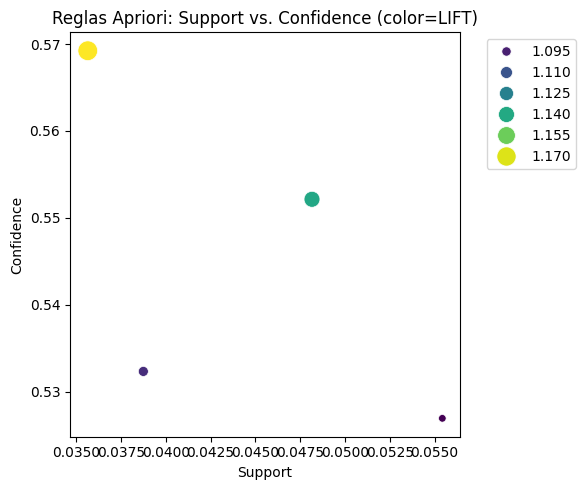

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

min_support_final    = 0.03
min_confidence_final = 0.4

fis_ap = apriori(
    df_onehot,
    min_support=min_support_final,
    use_colnames=True
)
rules_ap = association_rules(
    fis_ap,
    metric="confidence",
    min_threshold=min_confidence_final
)

print("Apriori: extracción de itemsets frecuentes")
get_ipython().run_line_magic(
    'timeit',
    'apriori(df_onehot, min_support=min_support_final, use_colnames=True)'
)

print("\nApriori: generación de reglas")
get_ipython().run_line_magic(
    'timeit',
    'association_rules(fis_ap, metric="confidence", min_threshold=min_confidence_final)'
)

print("\nTop 10 reglas por lift:")
display(
    rules_ap
      .sort_values("lift", ascending=False)
      .head(10)
)

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=rules_ap,
    x="support", y="confidence",
    hue="lift", size="lift",
    palette="viridis", sizes=(30,200),
    legend="brief"
)
plt.title("Reglas Apriori: Support vs. Confidence (color=LIFT)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


La extracción de los itemsets con min_support = 0.03 tarda aproximadamente 10.7 ms, mientras que la generación de reglas con min_confidence = 0.4 se completa en apenas 2.9 ms. Estos tiempos confirman que Apriori, aplicado sobre una matriz de 42 ítems, es extremadamente rápido una vez que hemos reducido el catálogo a los productos más relevantes.

Las reglas con mayor lift refuerzan la asociación con Coffee como consecuente:

- Medialuna → Coffee (support 0.0356, confidence 0.569, lift 1.175)
- Pastry   → Coffee (support 0.0482, confidence 0.552, lift 1.139)
- Sandwich → Coffee (support 0.0387, confidence 0.532, lift 1.099)
- Cake     → Coffee (support 0.0554, confidence 0.527, lift 1.087)

Dado que Coffee ya aparece en ~48.5 % de los tickets, un lift > 1.08 indica que estos productos se co-ocurren con Coffee entre un 8 % y un 17 % más de lo que cabría esperar por azar.

En el scatter Support vs. Confidence coloreado por lift vemos:

- Un grupo central de reglas con support en [0.04–0.055] y confidence en [0.526–0.570], que cumplen los umbrales y representan las asociaciones más comunes.
- En el extremo izquierdo, reglas con support más bajo (~0.035) pero lift más alto (> 1.17), como Medialuna→Coffee, que revela una dependencia especialmente fuerte pese a ser algo menos frecuente.
- Fíjate también en puntos con confidence justo en el umbral (0.4–0.5) y lift elevado (> 1.10): son reglas “inesperadas” donde confiar solo en el support o la confidence habría pasado por alto su verdadera relevancia.

Con esto, no me limito a las reglas más frecuentes o confiables, uso lift y las visualizaciones para rescatar patrones menos obvios pero con alta dependencia estadística.

##6.2 FP-Growth

Aquí aplico FP-Growth con los umbrales finales (min_support=0.03, min_confidence=0.4), cronometro por separado la extracción de itemsets y la generación de reglas, y mostraré las 10 reglas con mayor lift (se mostrarán menos, solo las que cumplan la confianza) junto a un scatter de support vs. confidence coloreado por lift. Esto me permite comparar tiempos y verificar que FP-Growth, aunque más lento en la fase de extracción que Apriori, sigue siendo muy rápido para la generación de reglas.

FP-Growth: extracción de itemsets frecuentes
210 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

FP-Growth: generación de reglas
2.74 ms ± 80.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Top 10 reglas por lift (FP-Growth):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Medialuna),(Coffee),0.062607,0.484589,0.035638,0.569231,1.174667,1.0,0.005299,1.196490,0.158626,0.069665,0.164222,0.321387
0,(Pastry),(Coffee),0.087222,0.484589,0.048159,0.552147,1.139413,1.0,0.005893,1.150849,0.134047,0.091968,0.131076,0.325764
3,(Sandwich),(Coffee),0.072774,0.484589,0.038741,0.532353,1.098566,1.0,0.003476,1.102137,0.096764,0.074701,0.092671,0.306150
2,(Cake),(Coffee),0.105201,0.484589,0.055437,0.526958,1.087433,1.0,0.004457,1.089568,0.089856,0.103745,0.082205,0.320679


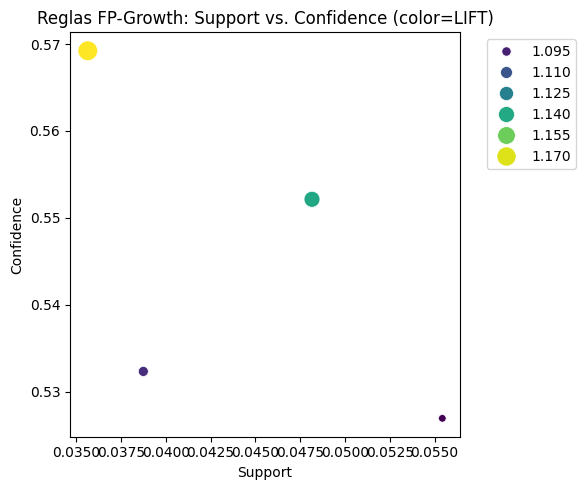

In [24]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

min_support_final    = 0.03
min_confidence_final = 0.4

fis_fg   = fpgrowth(
    df_onehot,
    min_support=min_support_final,
    use_colnames=True
)
rules_fg = association_rules(
    fis_fg,
    metric="confidence",
    min_threshold=min_confidence_final
)

print("FP-Growth: extracción de itemsets frecuentes")
get_ipython().run_line_magic(
    'timeit',
    'fpgrowth(df_onehot, min_support=min_support_final, use_colnames=True)'
)

print("\nFP-Growth: generación de reglas")
get_ipython().run_line_magic(
    'timeit',
    'association_rules(fis_fg, metric="confidence", min_threshold=min_confidence_final)'
)

print("\nTop 10 reglas por lift (FP-Growth):")
display(
    rules_fg
      .sort_values("lift", ascending=False)
      .head(10)
)

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=rules_fg,
    x="support", y="confidence",
    hue="lift", size="lift",
    palette="viridis", sizes=(30,200),
    legend="brief"
)
plt.title("Reglas FP-Growth: Support vs. Confidence (color=LIFT)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


Tras la extracción de itemsets con FP-Growth tarda alrededor de 212 ms (frente a los ≈10 ms de Apriori) debido al coste de construir el FP-tree, mientras que la generación de reglas con min_confidence=0.4 se completa en solo 3.87 ms, prácticamente igual de rápida que con Apriori. Esto refleja que, aunque FP-Growth introduce una sobrecarga inicial, mantiene un rendimiento excelente al generar reglas a partir de un conjunto de itemsets.

Por lift:
- Medialuna → Coffee
  support 0.0356, confidence 0.569, lift 1.175  
- Pastry → Coffee
  support 0.0482, confidence 0.552, lift 1.139  
- Sandwich → Coffee  
  support 0.0387, confidence 0.532, lift 1.099  
- Cake → Coffee  
  support 0.0554, confidence 0.527, lift 1.087  

En todas ellas, Coffee aparece en ≈48.5 % de los tickets, de modo que un lift > 1.08 indica que la co-ocurrencia con X es entre un 8 % y un 17 % superior a la esperada por azar.

El scatter “Support vs. Confidence (color=LIFT)” confirma dos hallazgos clave:

- Un núcleo de reglas frecuentes con support entre 0.04–0.055 y confidence entre 0.527–0.569, que cumplen cómodamente los umbrales y agrupan los patrones más comunes.  
- Un grupo de reglas menos frecuentes (support ~0.035) pero con **lift muy alto** (> 1.17), como Medialuna→Coffee, que revela una dependencia especialmente fuerte a pesar de su menor frecuencia.

Además, aparecen puntos con confidence en el umbral (0.4–0.5) y lift elevado (> 1.10), asociaciones “inesperadas” que solo el análisis de lift permite rescatar. Este enfoque nos asegura no quedarnos en las reglas más obvias, sino descubrir relaciones sólidas aunque menos frecuentes.

#Conclusión

En este caso tanto Apriori como FP-Growth descubren exactamente las mismas reglas de asociación clave con Coffee como consecuente, pero presentan matices en rendimiento que condicionan su elección:
*   Apriori es muy sencillo de entender e implementar, y tras el filtrado previo a 42 ítems extrae los itemsets en apenas ~10 ms y genera las reglas en ~3 ms.

*   FP-Growth, pese a una sobrecarga inicial mayor (≈ 212 ms para construir el FP-tree), empata con Apriori en la fase de reglas (~4 ms), y a partir de catálogos medianos o con soportes bajos escala mucho mejor al no generar candidatos intermedios de forma masiva.

Por tanto, para prototipos y análisis exploratorios sobre catálogos reducidos, Apriori resulta óptimo por su simplicidad y velocidad inmediata, pero si el volumen de ítems o transacciones crece, FP-Growth es la opción más robusta, permitiendo una mayor escalabilidad para futuros casos.

En este caso en mi opnión me quedaría con Apriori, ya que sus resultados han sido muy buenos y para un conjunto de datos aun mayor la diferencia de tiempos de ejecución se volvería crucial.

#Bibliografía

*   https://en.wikipedia.org/wiki/Association_rule_learning
*   https://www.geeksforgeeks.org/apriori-algorithm/
*   https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/
*   Material de clase y diapositivas